In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [41]:
data=pd.read_csv("C3_ChicagoCrimeData.csv", index_col=0)

In [42]:
data.head()

CASE_NUMBER        DATE                     BLOCK IUCR PRIMARY_TYPE  \
ID                                                                             
3512276     HK587712  2004-08-28        047XX S KEDZIE AVE  890        THEFT   
3406613     HK456306  2004-06-26  009XX N CENTRAL PARK AVE  820        THEFT   
8002131     HT233595  2011-04-04        043XX S WABASH AVE  820        THEFT   
7903289     HT133522  2010-12-30      083XX S KINGSTON AVE  840        THEFT   
10402076    HZ138551  2016-02-02           033XX W 66TH ST  820        THEFT   

                            DESCRIPTION          LOCATION_DESCRIPTION  ARREST  \
ID                                                                              
3512276                   FROM BUILDING            SMALL RETAIL STORE   False   
3406613                  $500 AND UNDER                         OTHER   False   
8002131                  $500 AND UNDER  NURSING HOME/RETIREMENT HOME   False   
7903289   FINANCIAL ID THEFT: OVER $300                     RESIDENCE   False   
10402076                 $500 AND UNDER                         ALLEY   False   

          DOMESTIC  BEAT  DISTRICT  WARD  COMMUNITY_AREA_NUMBER FBICODE  \
ID                                                                        
3512276      False   911         9  14.0                   58.0       6   
3406613      False  1112        11  27.0                   23.0       6   
8002131      False   221         2   3.0                   38.0       6   
7903289      False   423         4   7.0                   46.0       6   
10402076     False   831         8  15.0                   66.0       6   

          X_COORDINATE  Y_COORDINATE  YEAR   LATITUDE  LONGITUDE  \
ID                                                                 
3512276      1155838.0     1873050.0  2004  41.807441 -87.703956   
3406613      1152206.0     1906127.0  2004  41.898280 -87.716406   
8002131      1177436.0     1876313.0  2011  41.815933 -87.624642   
7903289      1194622.0     1850125.0  2010  41.743665 -87.562463   
10402076     1155240.0     1860661.0  2016  41.773455 -87.706480   

                               LOCATION  
ID                                       
3512276     (41.8074405, -87.703955849)  
3406613   (41.898279962, -87.716405505)  
8002131   (41.815933131, -87.624642127)  
7903289   (41.743665322, -87.562462756)  
10402076  (41.773455295, -87.706480471)

In [43]:
data.tail()

CASE_NUMBER        DATE                BLOCK  IUCR  \
ID                                                            
10453948    HZ192829  2016-03-01      028XX E 79TH ST  1055   
10397129    HZ133234  2016-01-29  006XX W HARRISON ST  5114   
3269495     HJ747227  2003-11-08      012XX W 81ST ST   510   
10840565    JA143710  2017-02-06   009XX N KARLOV AVE  5073   
1326195      G021609  2001-01-11  087XX S ESCANABA AV  9901   

                              PRIMARY_TYPE  \
ID                                           
10453948                 HUMAN TRAFFICKING   
10397129                    NON - CRIMINAL   
3269495                          RITUALISM   
10840565  NON-CRIMINAL (SUBJECT SPECIFIED)   
1326195                  DOMESTIC VIOLENCE   

                                          DESCRIPTION LOCATION_DESCRIPTION  \
ID                                                                           
10453948                        INVOLUNTARY SERVITUDE            APARTMENT   
10397129                            FOID - REVOCATION               STREET   
3269495   AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY                OTHER   
10840565       NOTIFICATION OF CIVIL NO CONTACT ORDER            RESIDENCE   
1326195                             DOMESTIC VIOLENCE            APARTMENT   

          ARREST  DOMESTIC  BEAT  DISTRICT  WARD  COMMUNITY_AREA_NUMBER  \
ID                                                                        
10453948   False     False   422         4   7.0                   46.0   
10397129   False     False   124         1   2.0                   28.0   
3269495    False     False   612         6  21.0                   71.0   
10840565   False      True  1111        11  37.0                   23.0   
1326195     True      True   423         4   NaN                    NaN   

         FBICODE  X_COORDINATE  Y_COORDINATE  YEAR   LATITUDE  LONGITUDE  \
ID                                                                         
10453948      26     1196679.0     1853139.0  2016  41.751885 -87.554826   
10397129      26     1172257.0     1897564.0  2016  41.874363 -87.643013   
3269495      04B     1169648.0     1851076.0  2003  41.746852 -87.653941   
10840565      26     1148881.0     1905963.0  2017  41.897895 -87.728622   
1326195      08B     1196869.0     1847416.0  2001  41.736176 -87.554320   

                               LOCATION  
ID                                       
10453948  (41.751885152, -87.554825997)  
10397129  (41.874363279, -87.643013039)  
3269495   (41.746852486, -87.653941385)  
10840565   (41.89789489, -87.728622316)  
1326195    (41.73617608, -87.554319607)

In [44]:
data.columns

Index(['CASE_NUMBER', 'DATE', 'BLOCK', 'IUCR', 'PRIMARY_TYPE', 'DESCRIPTION',
       'LOCATION_DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'DISTRICT',
       'WARD', 'COMMUNITY_AREA_NUMBER', 'FBICODE', 'X_COORDINATE',
       'Y_COORDINATE', 'YEAR', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [45]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("NUMERICAL COLUMNS:",numerical_cols)
print("CATEGORICAL COLUMNS:",categorical_cols)

NUMERICAL COLUMNS: ['BEAT', 'DISTRICT', 'WARD', 'COMMUNITY_AREA_NUMBER', 'X_COORDINATE', 'Y_COORDINATE', 'YEAR', 'LATITUDE', 'LONGITUDE']
CATEGORICAL COLUMNS: ['CASE_NUMBER', 'DATE', 'BLOCK', 'IUCR', 'PRIMARY_TYPE', 'DESCRIPTION', 'LOCATION_DESCRIPTION', 'FBICODE', 'LOCATION']


## PREPROCESSING

In [46]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [47]:
# Handling missing values (Replacing with the mean)
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])


## ANALYSE UNIVARIATE

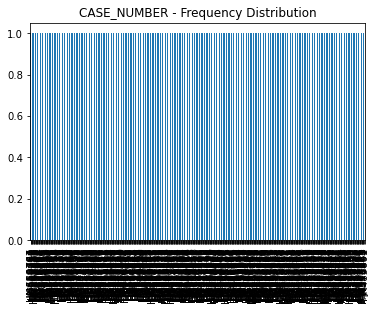

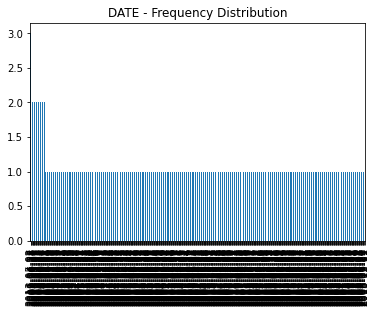

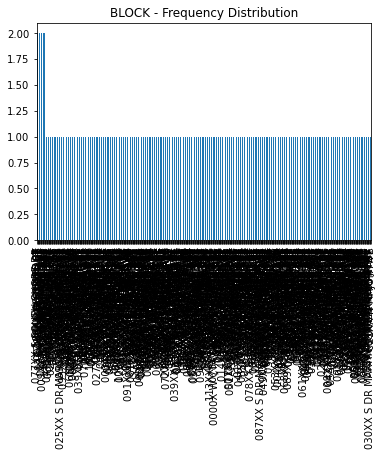

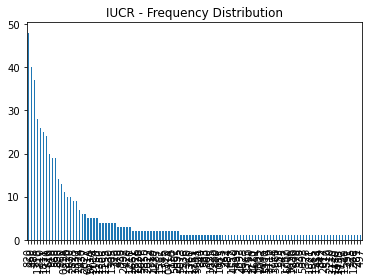

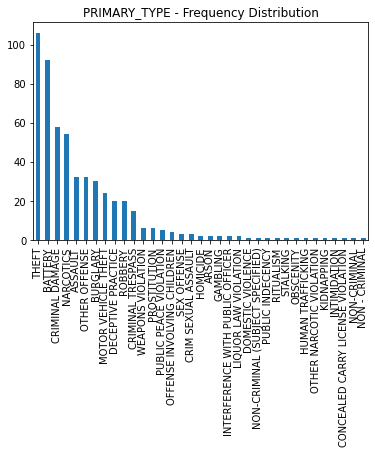

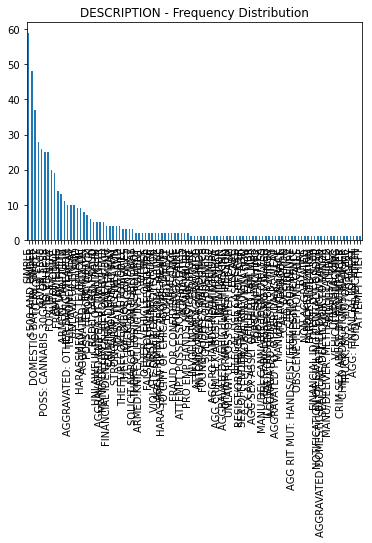

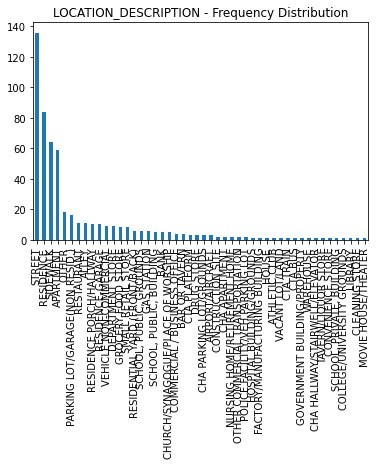

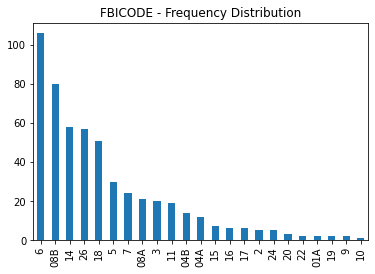

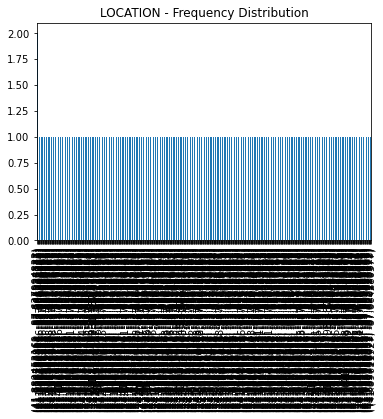

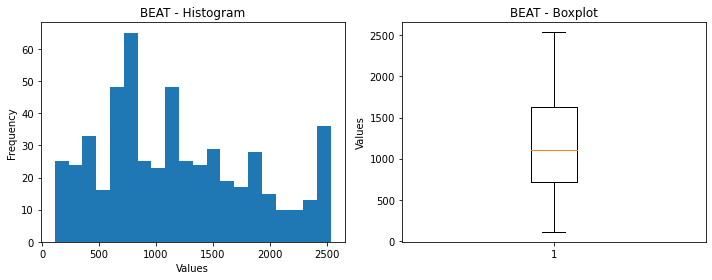

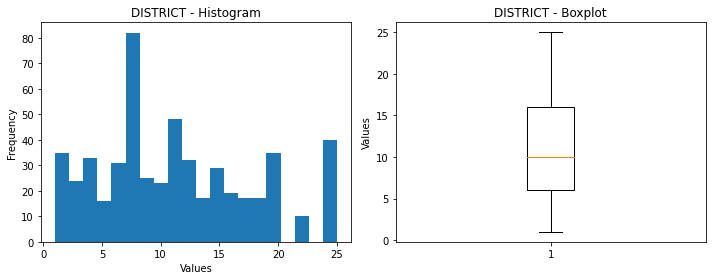

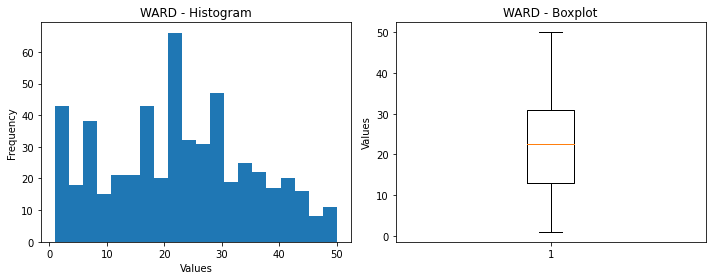

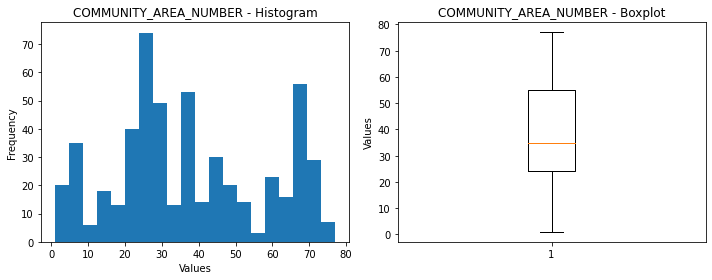

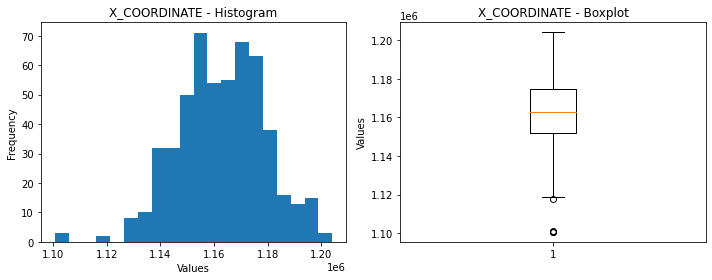

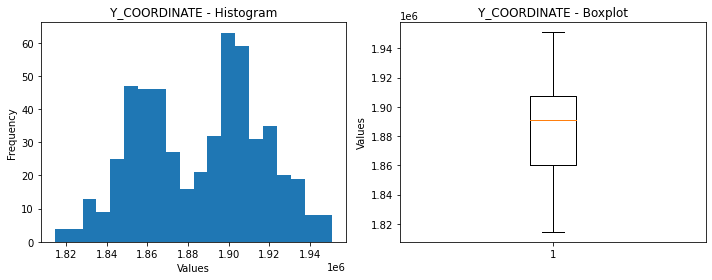

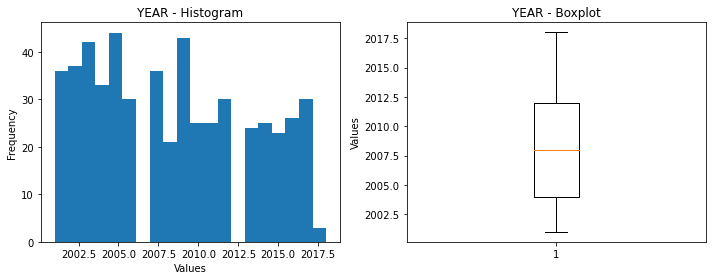

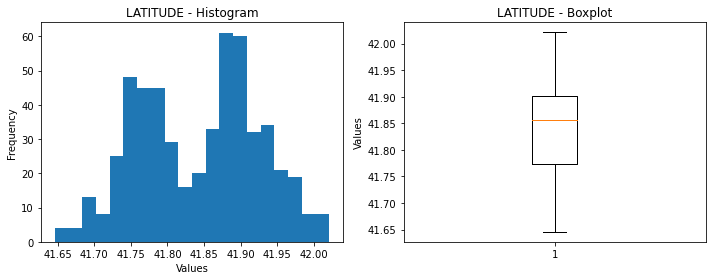

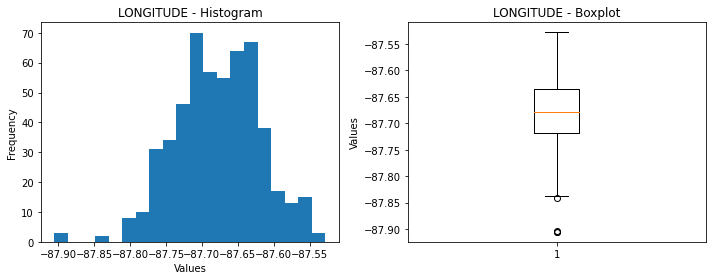

In [48]:
# Dictionary to store results for categorical columns
categorical_results = {}

# Analyze categorical columns
for col in categorical_cols:
    freq_dist = data[col].value_counts()  # Frequency distribution
    categorical_results[col] = {
        'Frequency Distribution': freq_dist,
        'Plot': freq_dist.plot(kind='bar' if len(freq_dist) <= 10 else 'bar'),
    }
    plt.title(f'{col} - Frequency Distribution')
    plt.show()

# Dictionary to store results for numerical columns
numerical_results = {}

# Analyze numerical columns
for col in numerical_cols:
    values = data[col].dropna()  # Drop NaN values for analysis
    mean = values.mean()  # Mean
    median = values.median()  # Median
    mode = values.mode()[0]  # Mode

    # Measures of dispersion
    rng = values.max() - values.min()  # Range
    var = values.var()  # Variance
    std_dev = values.std()  # Standard Deviation
    quartiles = values.quantile([0.25, 0.5, 0.75])  # Quartiles
    iqr = stats.iqr(values)  # Interquartile Range

    # Shape indicators
    skewness = stats.skew(values)  # Asymmetry
    kurtosis = stats.kurtosis(values)  # Flattening

    # Focus indicators
    sorted_vals = sorted(values)
    cumulative = np.cumsum(sorted_vals)
    gini_index = (2 * np.sum(cumulative) / (len(sorted_vals) * np.sum(sorted_vals))) - ((len(sorted_vals) + 1) / len(sorted_vals))  # Gini index

    # Organize results
    numerical_results[col] = {
        'Measures of Central Tendency': {'Mean': mean, 'Median': median, 'Mode': mode},
        'Measures of Dispersion': {'Range': rng, 'Variance': var, 'Standard Deviation': std_dev, 'Quartiles': quartiles, 'IQR': iqr},
        'Shape Indicators': {'Skewness': skewness, 'Kurtosis': kurtosis},
        'Focus Indicators': {'Gini Index': gini_index},
    }
    
     # Plot histograms and boxplots
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.hist(values, bins=20)
    plt.title(f'{col} - Histogram')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.boxplot(values)
    plt.title(f'{col} - Boxplot')
    plt.ylabel('Values')

    plt.tight_layout()
    plt.show()


In [49]:
numerical_results['COMMUNITY_AREA_NUMBER']

{'Measures of Central Tendency': {'Mean': 37.542857142857144,
  'Median': 35.0,
  'Mode': 25.0},
 'Measures of Dispersion': {'Range': 76.0,
  'Variance': 421.3187969924812,
  'Standard Deviation': 20.526051665931302,
  'Quartiles': 0.25    24.0
  0.50    35.0
  0.75    55.0
  Name: COMMUNITY_AREA_NUMBER, dtype: float64,
  'IQR': 31.0},
 'Shape Indicators': {'Skewness': 0.22074442527672555,
  'Kurtosis': -1.001819523953278},
 'Focus Indicators': {'Gini Index': -0.3110801349029505}}

## ANALYSE BIVARIATE

In [55]:

# Contingency table for two categorical variables
contingency_table = pd.crosstab(data['PRIMARY_TYPE'], data['LOCATION_DESCRIPTION'])

# Marginal distribution
marginal_distribution_primary_type = data['PRIMARY_TYPE'].value_counts(normalize=True)
marginal_distribution_location_desc = data['LOCATION_DESCRIPTION'].value_counts(normalize=True)

# Marginal means and variances for numerical variables
means_variances = {}
for col in numerical_cols:
    means_variances[col] = {'Mean': data[col].mean(), 'Variance': data[col].var()}

# Correlation coefficient for two numerical variables
correlation_coefficient = data[numerical_cols].corr()

# Linear regression for two numerical variables
slope, intercept, r_value, p_value, std_err = stats.linregress(data['YEAR'], data['LATITUDE'])

# Student's t-test or ANOVA for a categorical and a numerical variable
t_test_result = stats.ttest_ind(data[data['PRIMARY_TYPE'] == 'Theft']['YEAR'],
                                data[data['PRIMARY_TYPE'] == 'Battery']['YEAR'])

anova_result = stats.f_oneway(data[data['PRIMARY_TYPE'] == 'Theft']['YEAR'],
                              data[data['PRIMARY_TYPE'] == 'Battery']['YEAR'],
                              data[data['PRIMARY_TYPE'] == 'Assault']['YEAR'])

# Chi-Square Independence Test for two categorical variables
chi2_stat, chi2_p, _, _ = stats.chi2_contingency(contingency_table)


C:\Users\NEXUS COMPUTERS\miniconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


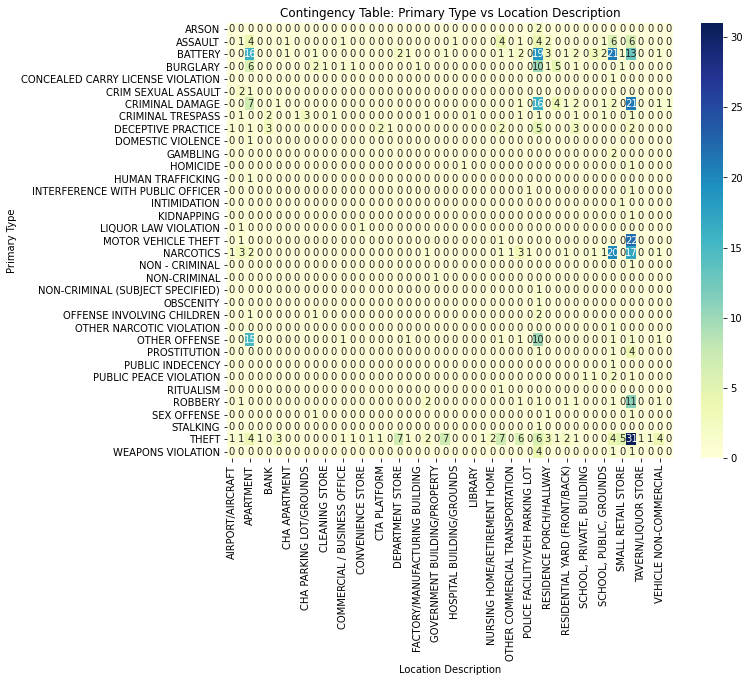


Marginal Distribution - Primary Type:
THEFT                                0.198874
BATTERY                              0.172608
CRIMINAL DAMAGE                      0.108818
NARCOTICS                            0.101313
ASSAULT                              0.060038
OTHER OFFENSE                        0.060038
BURGLARY                             0.056285
MOTOR VEHICLE THEFT                  0.045028
DECEPTIVE PRACTICE                   0.037523
ROBBERY                              0.037523
CRIMINAL TRESPASS                    0.028143
WEAPONS VIOLATION                    0.011257
PROSTITUTION                         0.011257
PUBLIC PEACE VIOLATION               0.009381
OFFENSE INVOLVING CHILDREN           0.007505
SEX OFFENSE                          0.005629
CRIM SEXUAL ASSAULT                  0.005629
HOMICIDE                             0.003752
ARSON                                0.003752
GAMBLING                             0.003752
INTERFERENCE WITH PUBLIC OFFICER     0.00

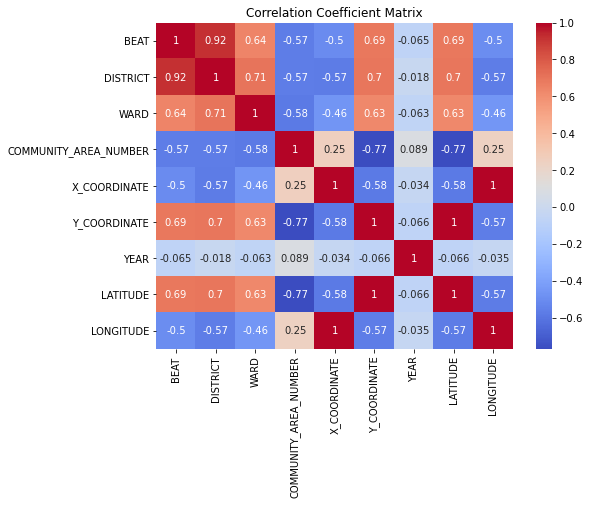


Linear Regression:
Slope: -0.0011025359436191058, Intercept: 44.05769925208534, R-Value: -0.0661554784567427, P-Value: 0.12715849685695507, Standard Error: 0.0007216510378831472

T-Test Result:
Ttest_indResult(statistic=nan, pvalue=nan)

ANOVA Result:
F_onewayResult(statistic=nan, pvalue=nan)

Chi-Square Independence Test:
Chi-Square Statistic: 2661.586532588523, P-Value: 2.5059875302371974e-56


In [56]:
# Displaying the results
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Contingency Table: Primary Type vs Location Description')
plt.xlabel('Location Description')
plt.ylabel('Primary Type')
plt.show()

print("\nMarginal Distribution - Primary Type:")
print(marginal_distribution_primary_type)

print("\nMarginal Distribution - Location Description:")
print(marginal_distribution_location_desc)

print("\nMarginal Means and Variances:")
for col, values in means_variances.items():
    print(f"{col}: Mean - {values['Mean']}, Variance - {values['Variance']}")

# Display Correlation Coefficient Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_coefficient, annot=True, cmap='coolwarm')
plt.title('Correlation Coefficient Matrix')
plt.show()

print("\nLinear Regression:")
print(f"Slope: {slope}, Intercept: {intercept}, R-Value: {r_value}, P-Value: {p_value}, Standard Error: {std_err}")

print("\nT-Test Result:")
print(t_test_result)

print("\nANOVA Result:")
print(anova_result)

print("\nChi-Square Independence Test:")
print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {chi2_p}")

**Data Representation: Contingency Table, Marginal Distribution, Marginal Means, and Variances**

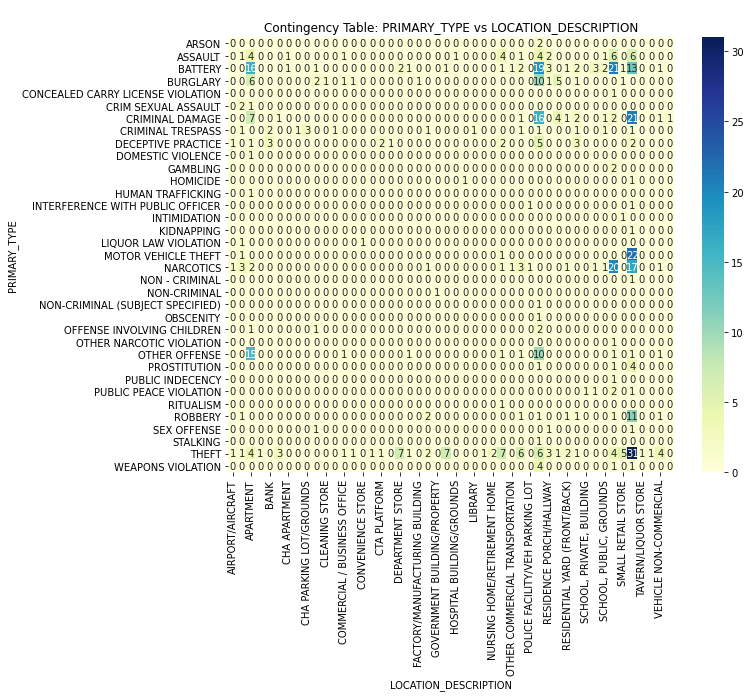

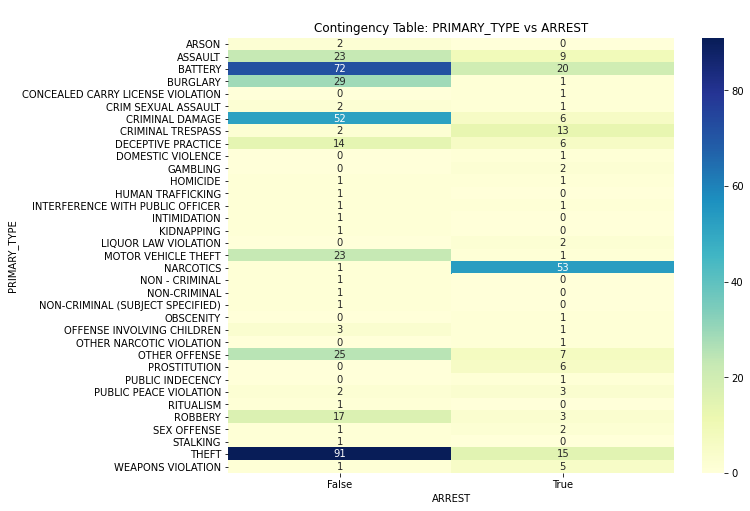

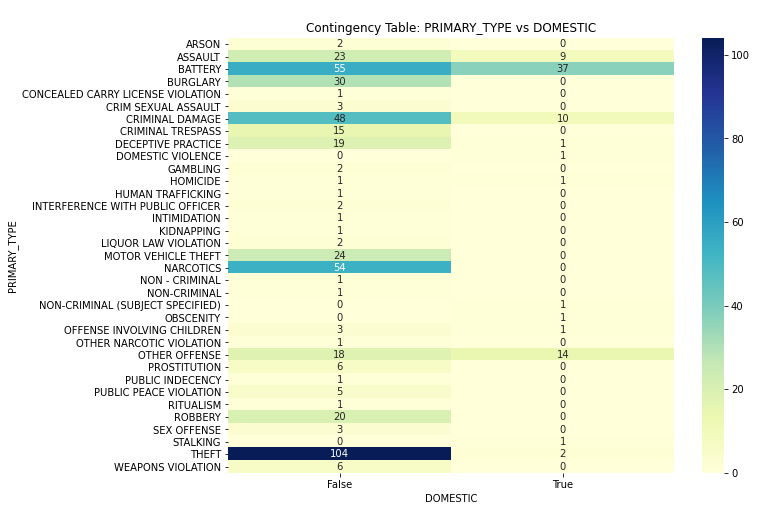

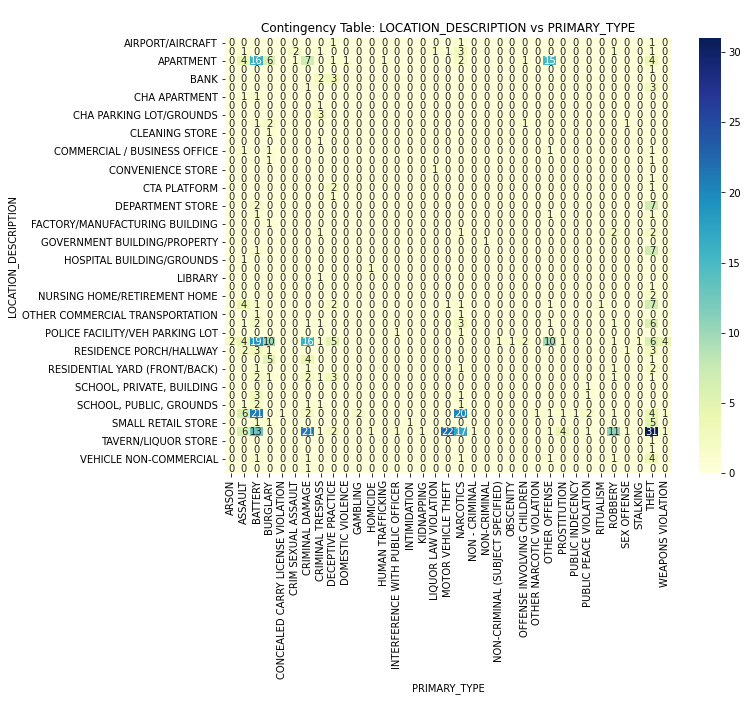

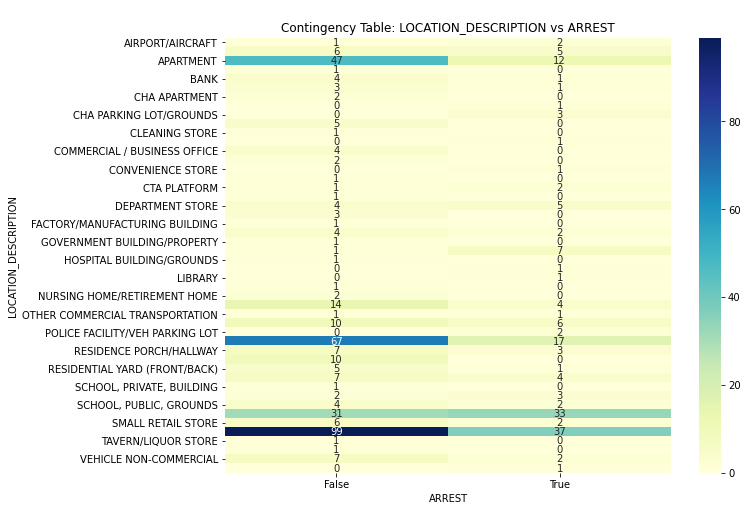

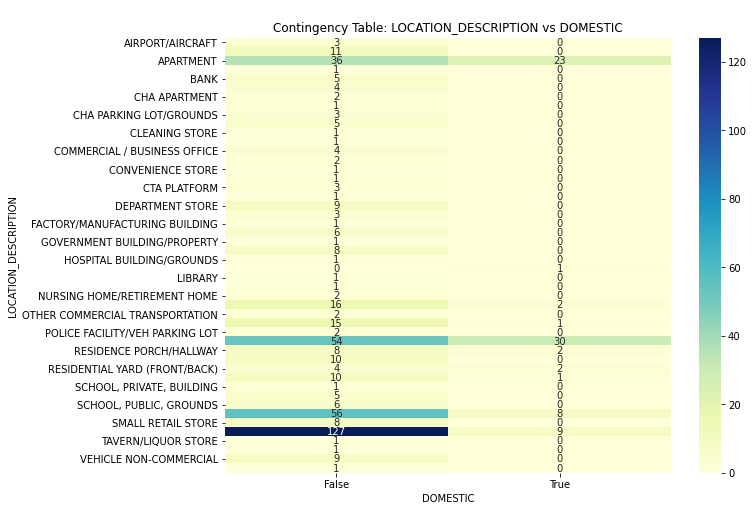

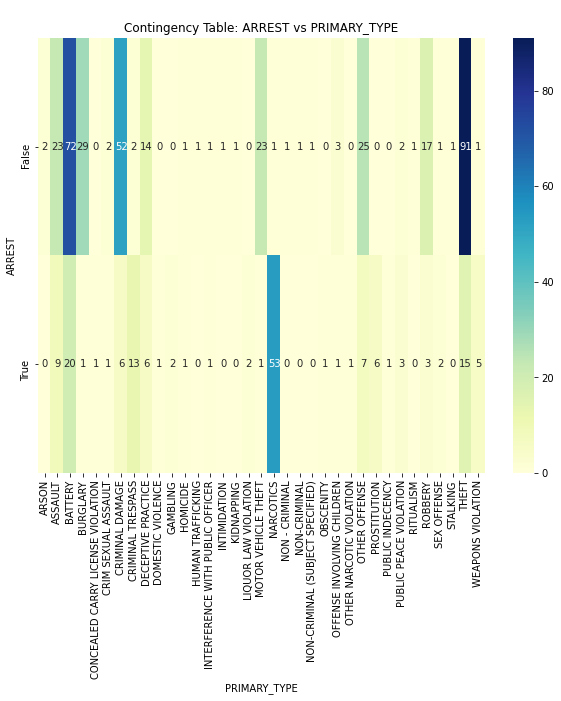

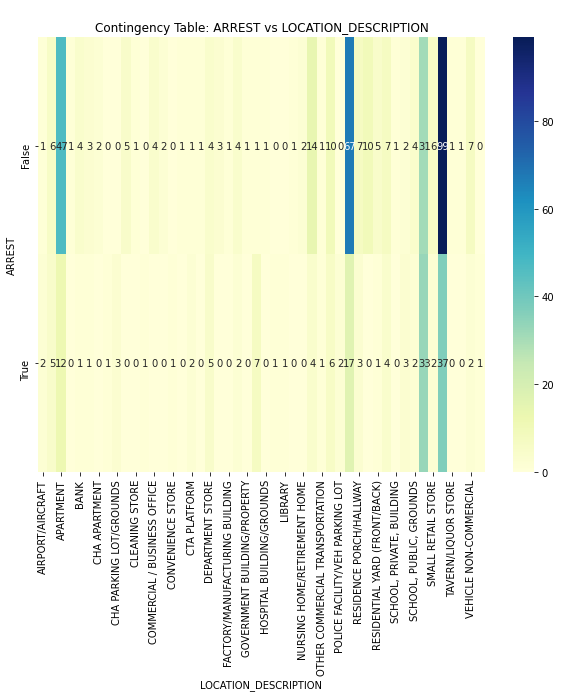

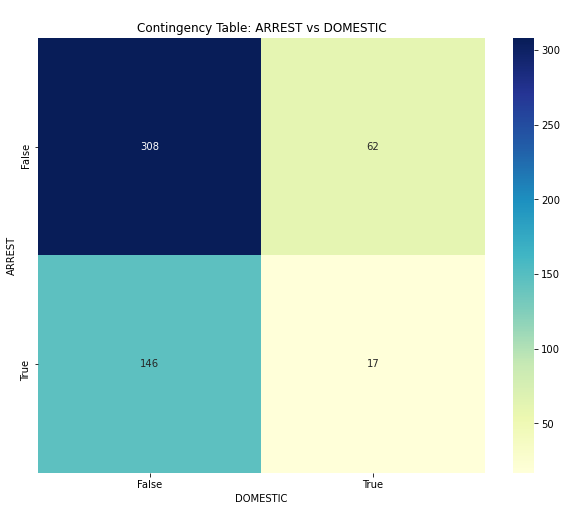

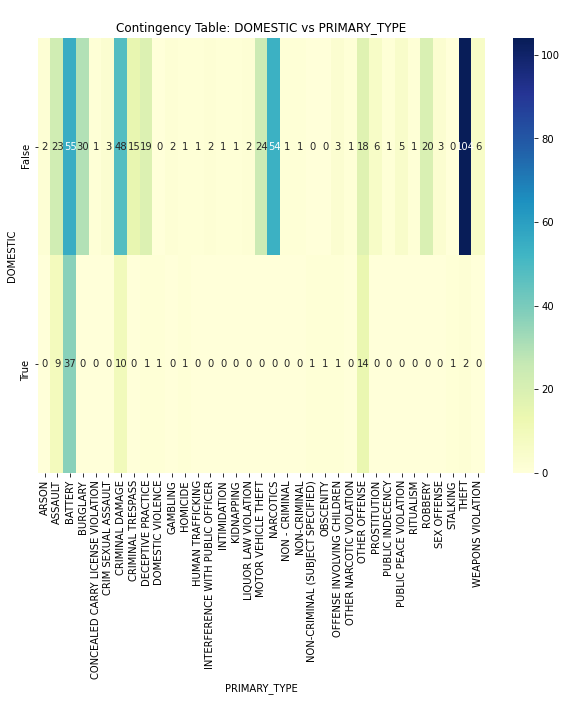

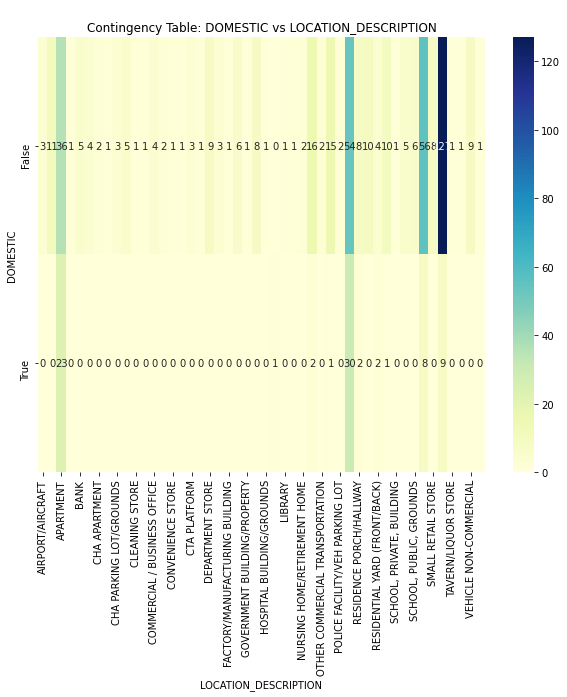

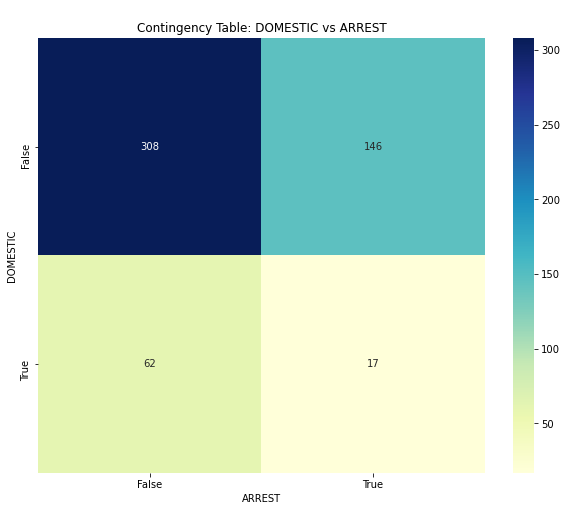


Marginal Distribution for PRIMARY_TYPE:
THEFT                                0.198874
BATTERY                              0.172608
CRIMINAL DAMAGE                      0.108818
NARCOTICS                            0.101313
ASSAULT                              0.060038
OTHER OFFENSE                        0.060038
BURGLARY                             0.056285
MOTOR VEHICLE THEFT                  0.045028
DECEPTIVE PRACTICE                   0.037523
ROBBERY                              0.037523
CRIMINAL TRESPASS                    0.028143
WEAPONS VIOLATION                    0.011257
PROSTITUTION                         0.011257
PUBLIC PEACE VIOLATION               0.009381
OFFENSE INVOLVING CHILDREN           0.007505
SEX OFFENSE                          0.005629
CRIM SEXUAL ASSAULT                  0.005629
HOMICIDE                             0.003752
ARSON                                0.003752
GAMBLING                             0.003752
INTERFERENCE WITH PUBLIC OFFICER     0.

In [59]:
# Your additional quantitative and qualitative columns
additional_numerical_cols = ['BEAT', 'DISTRICT', 'WARD', 'COMMUNITY_AREA_NUMBER', 'X_COORDINATE', 'Y_COORDINATE', 'LATITUDE', 'LONGITUDE']
additional_categorical_cols = ['PRIMARY_TYPE', 'LOCATION_DESCRIPTION', 'ARREST', 'DOMESTIC']
# Contingency tables for pairs of qualitative variables
for col1 in additional_categorical_cols:
    for col2 in additional_categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(data[col1], data[col2])
            plt.figure(figsize=(10, 8))
            sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g')
            plt.title(f"\nContingency Table: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()

# Marginal distributions for qualitative variables
for col in additional_categorical_cols:
    marginal_distribution = data[col].value_counts(normalize=True)
    print(f"\nMarginal Distribution for {col}:")
    print(marginal_distribution)

# Marginal means and variances for quantitative variables
means_variances = {}
for col in additional_numerical_cols:
    means_variances[col] = {'Mean': data[col].mean(), 'Variance': data[col].var()}
print("\nMarginal Means and Variances for Quantitative Variables:")
print(means_variances)

**Analysis of Two Quantitative Variables: Correlation Coefficient, Linear Regression**

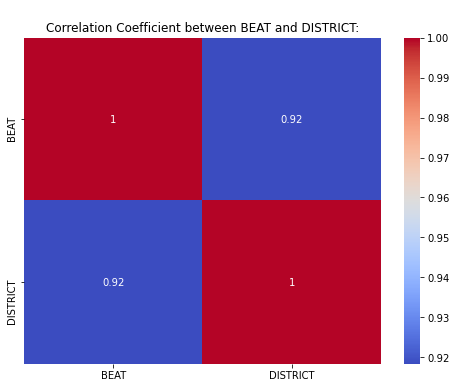

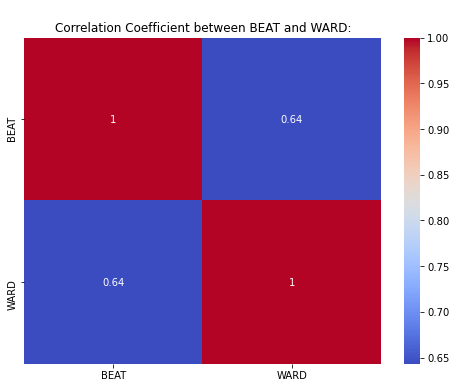

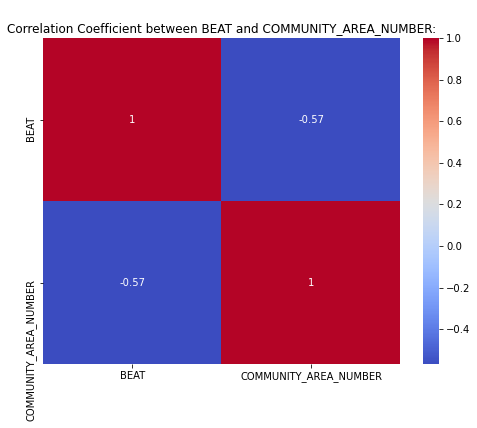

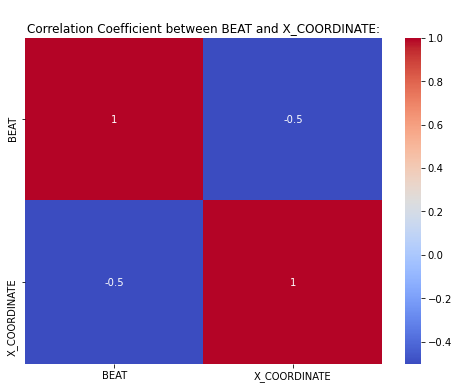

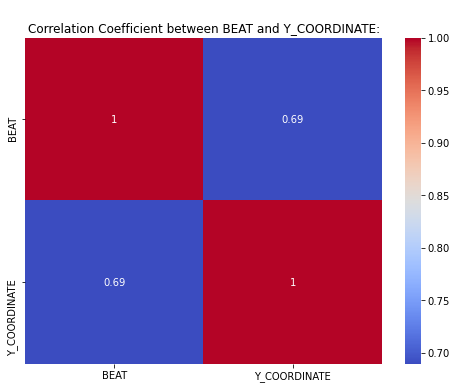

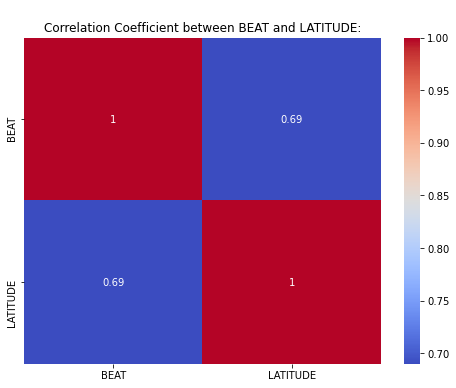

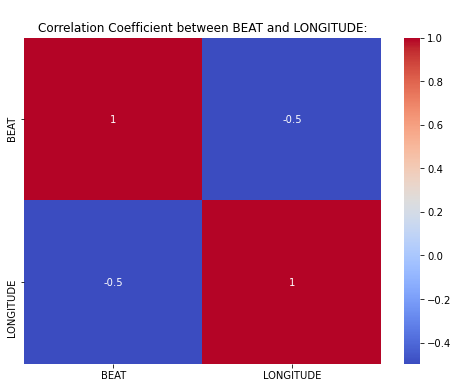

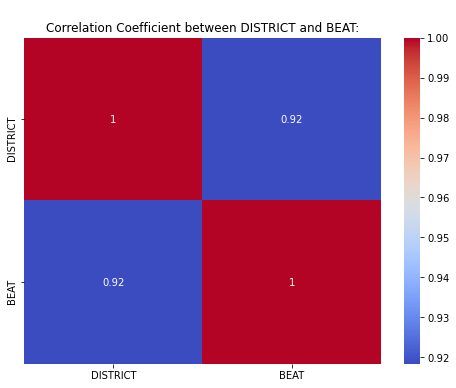

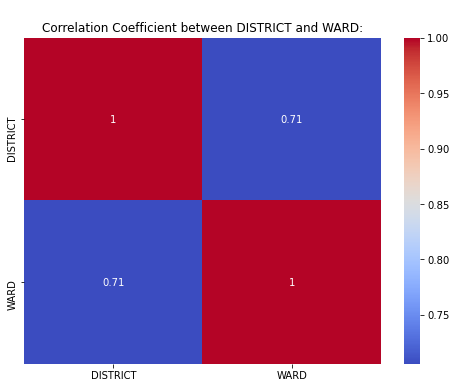

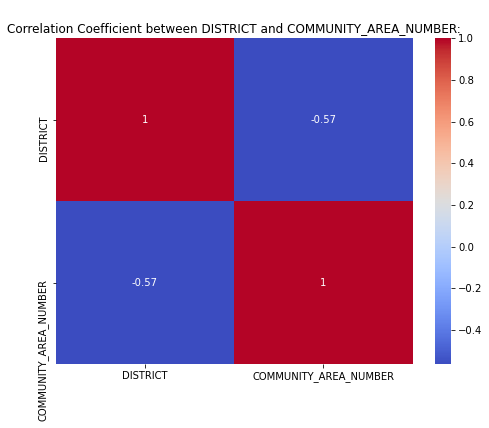

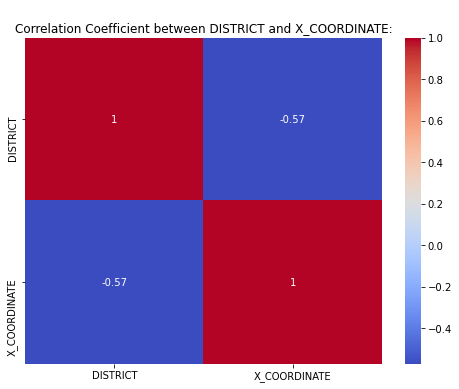

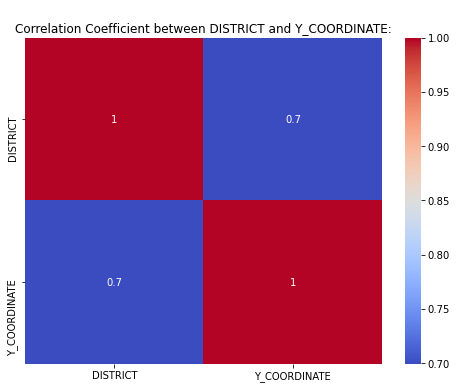

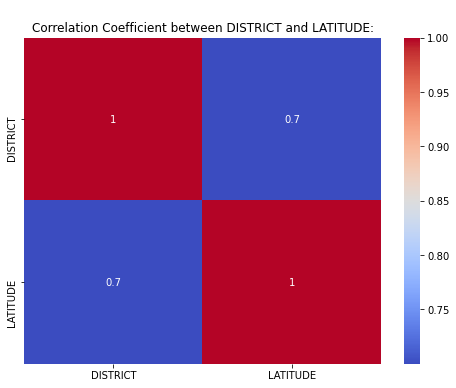

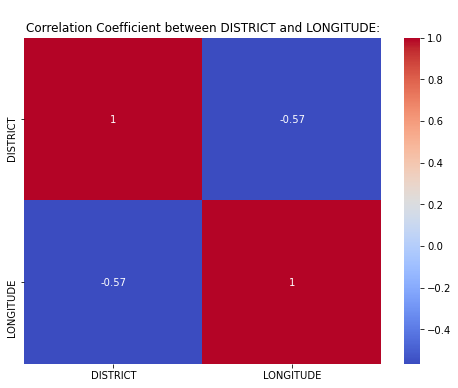

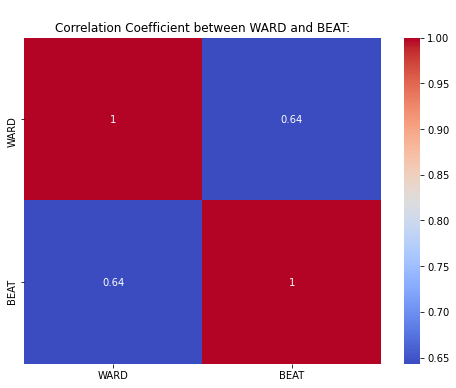

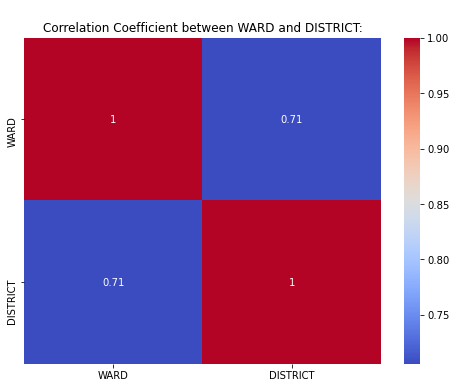

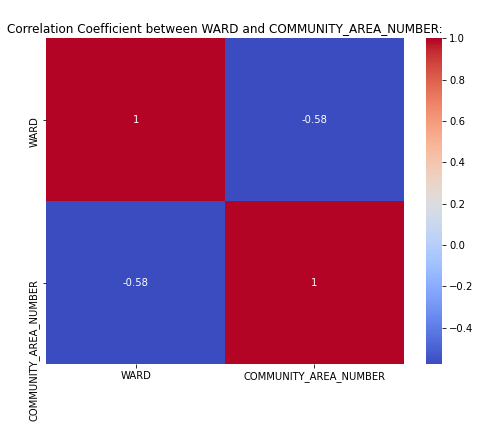

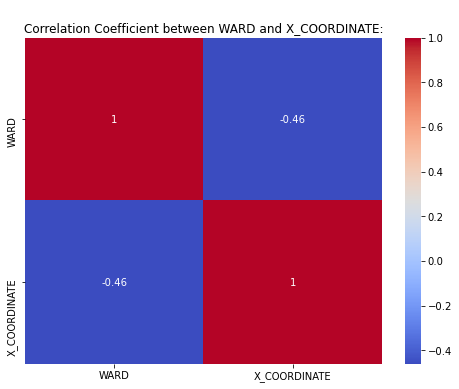

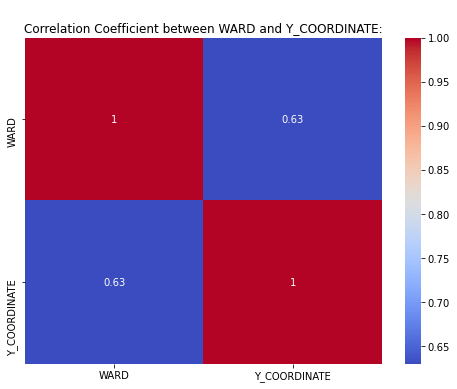

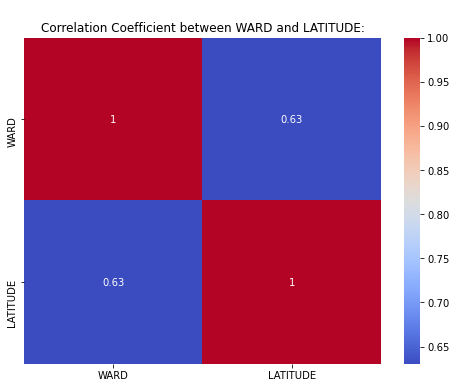

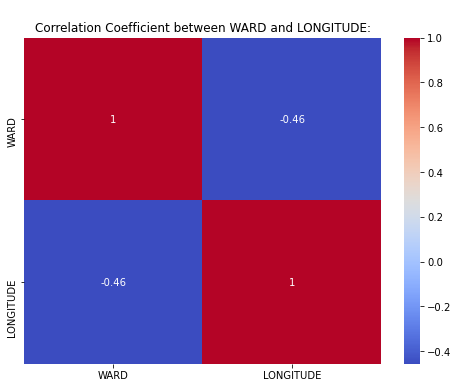

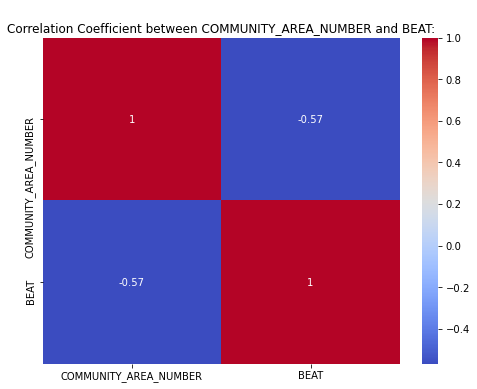

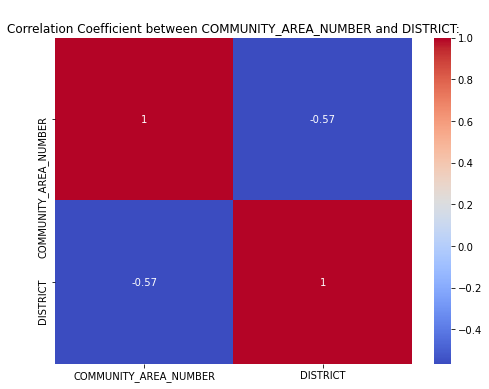

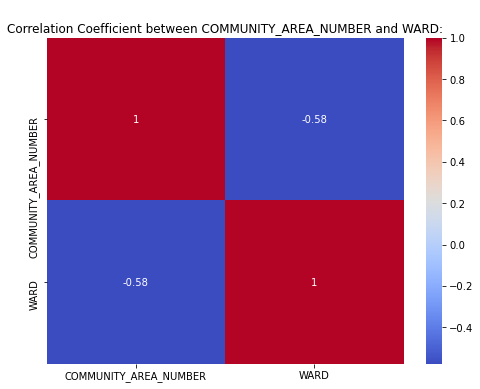

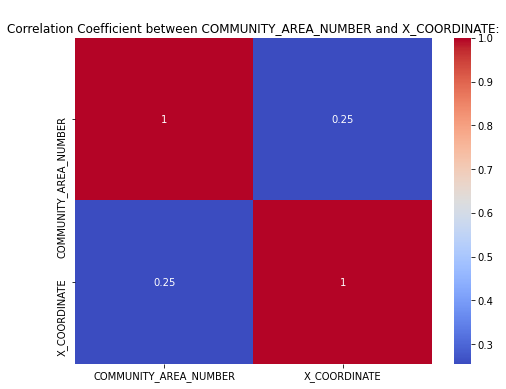

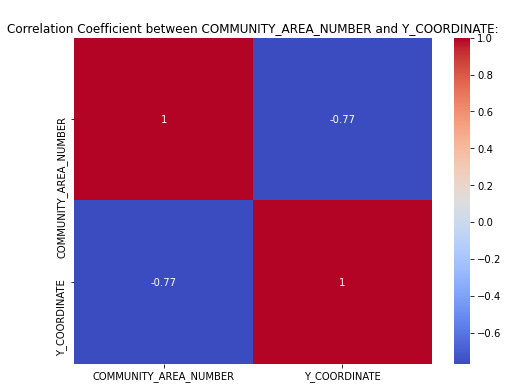

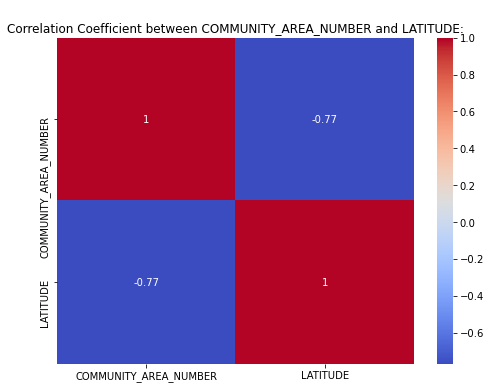

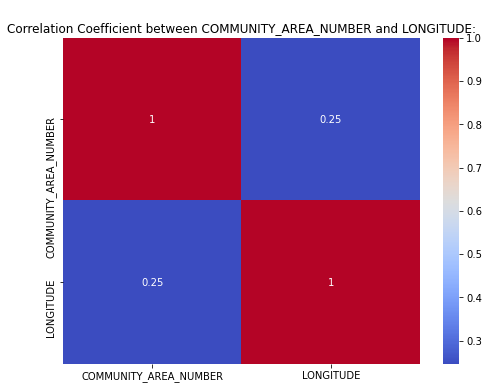

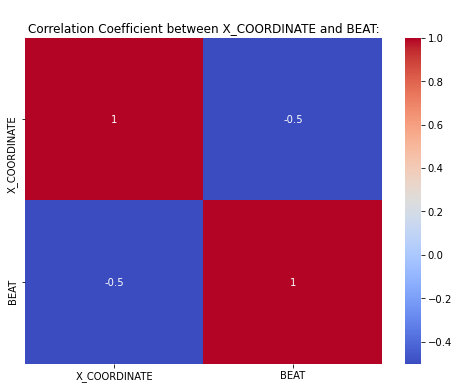

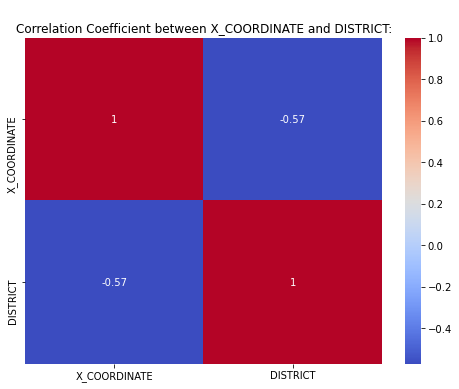

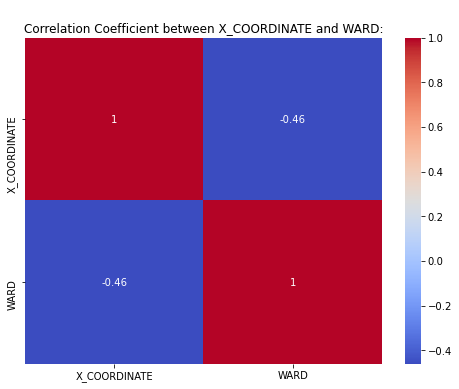

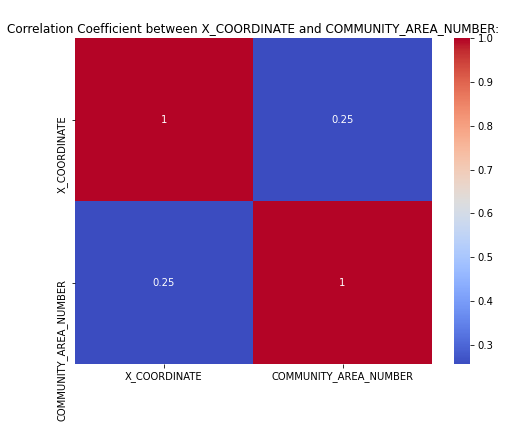

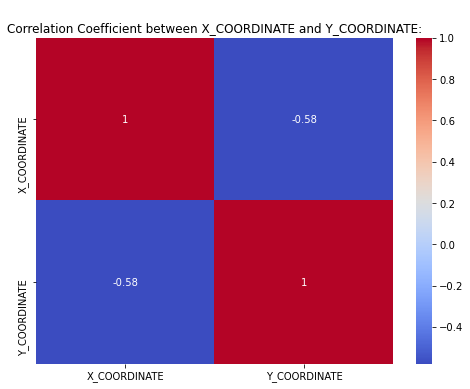

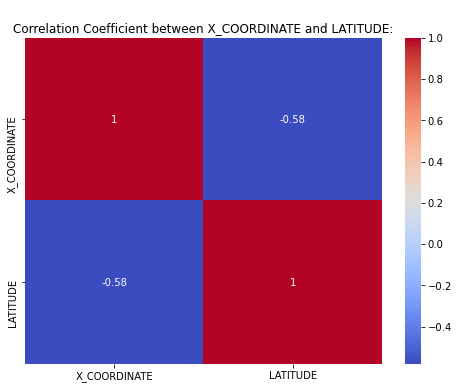

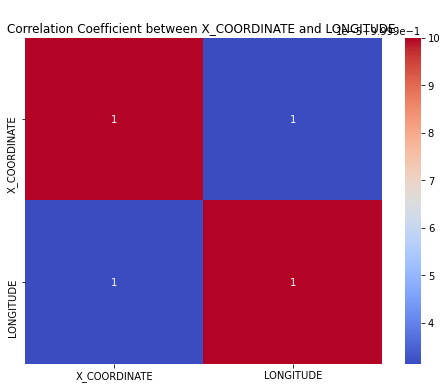

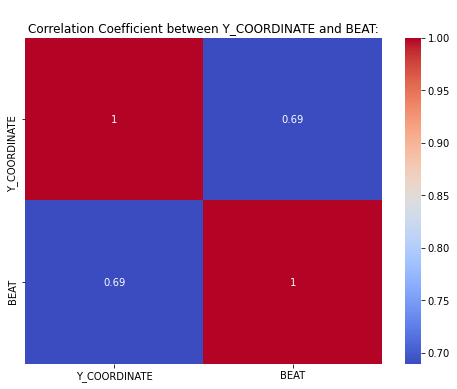

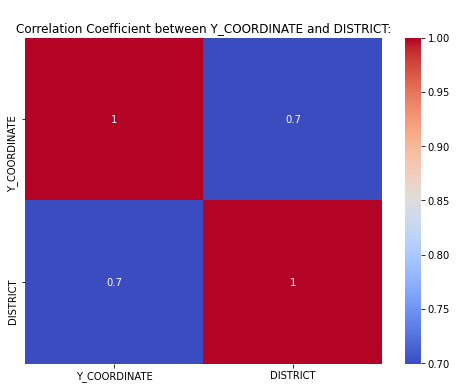

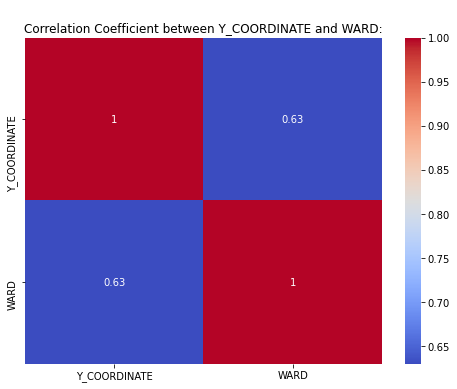

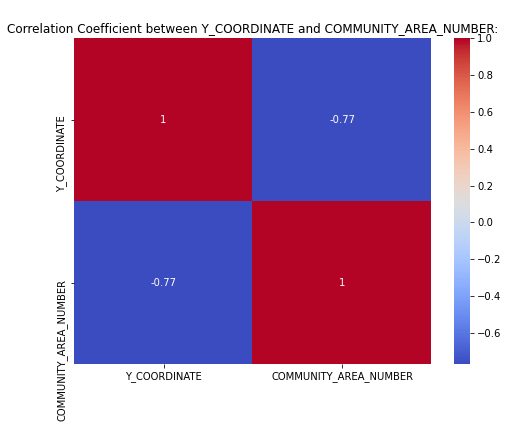

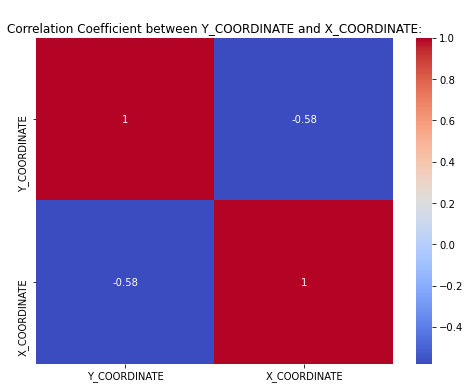

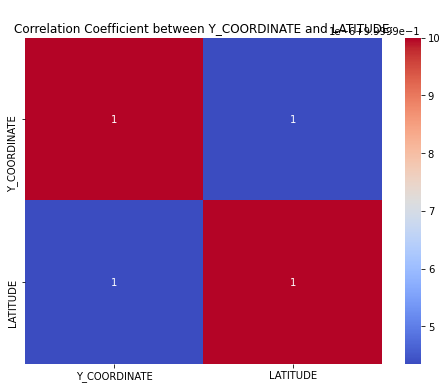

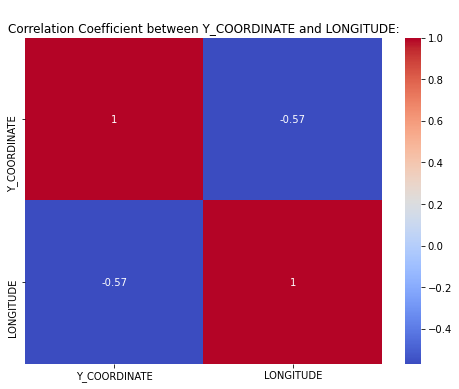

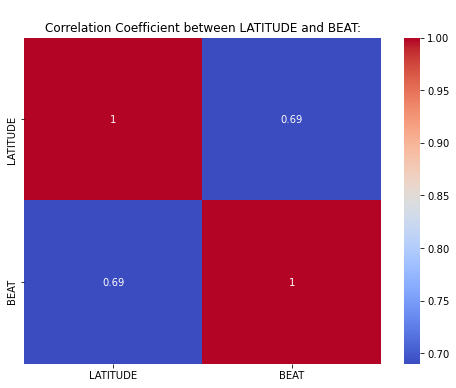

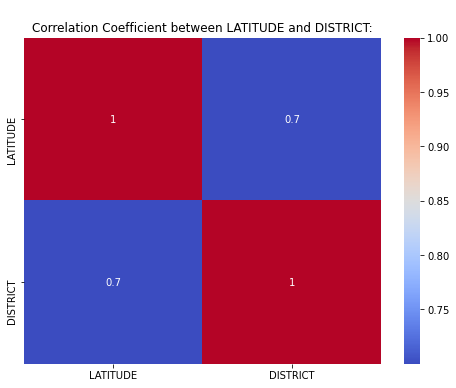

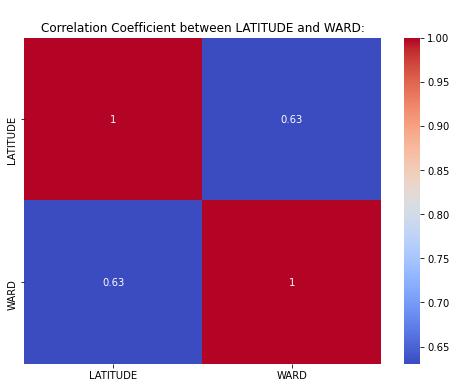

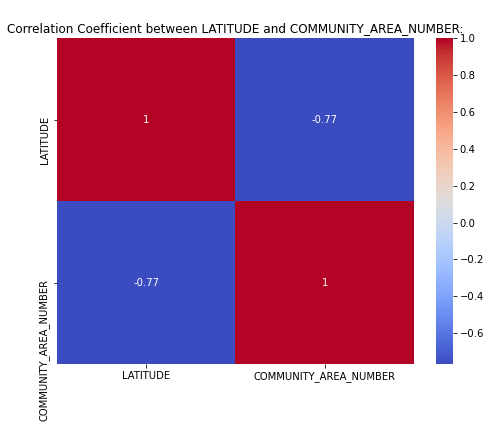

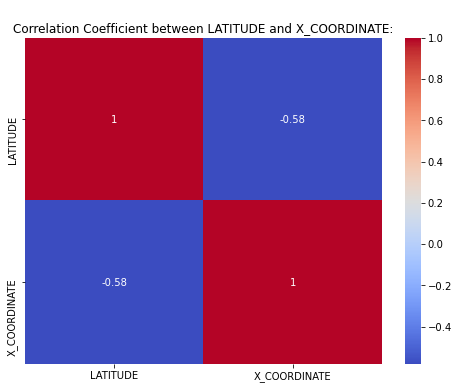

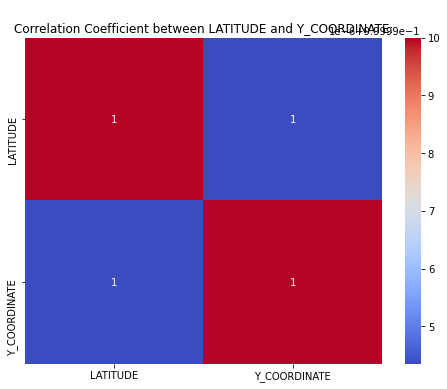

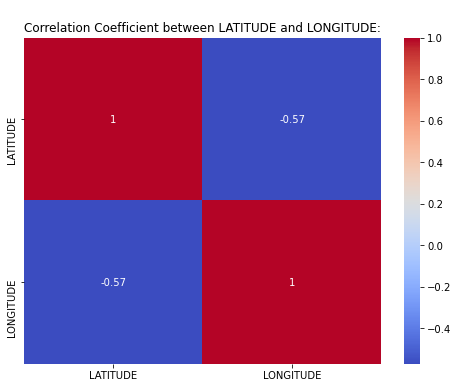

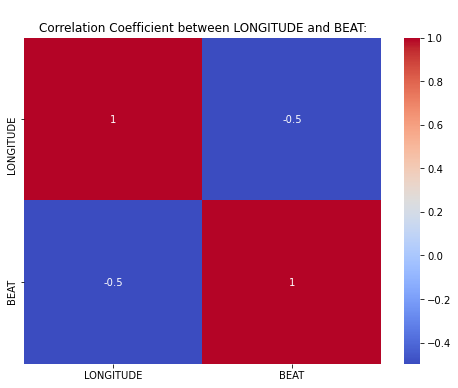

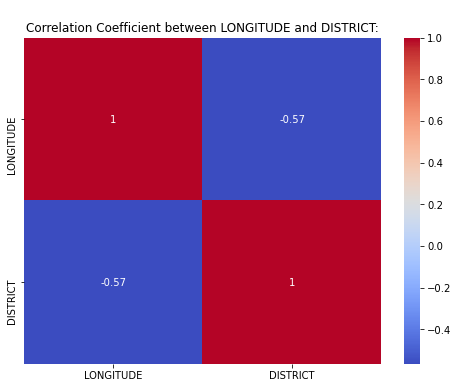

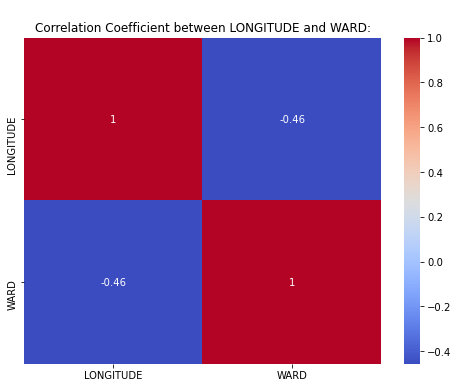

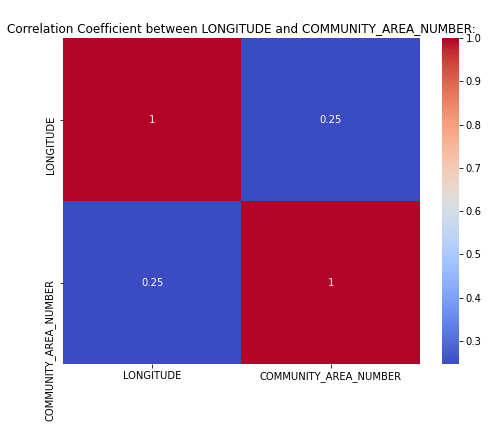

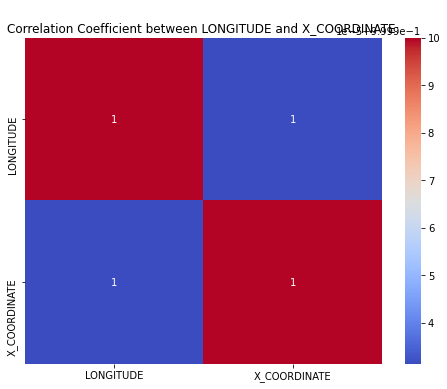

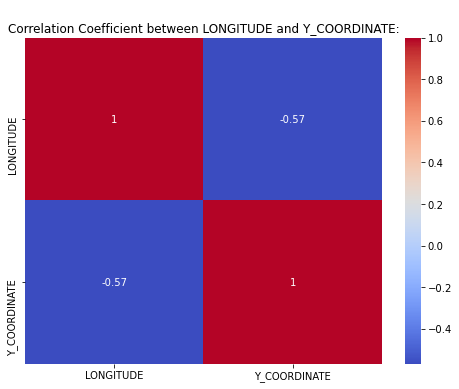

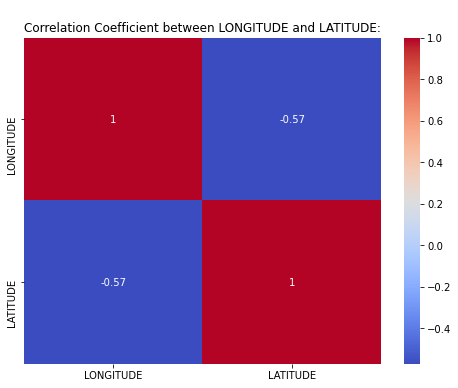

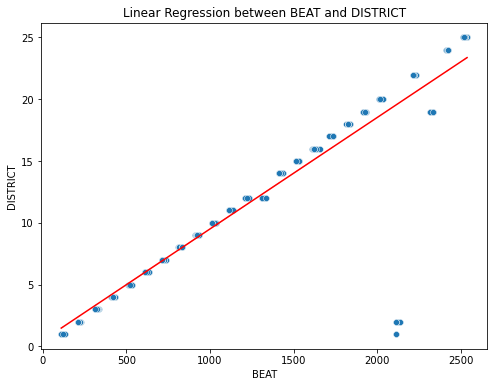

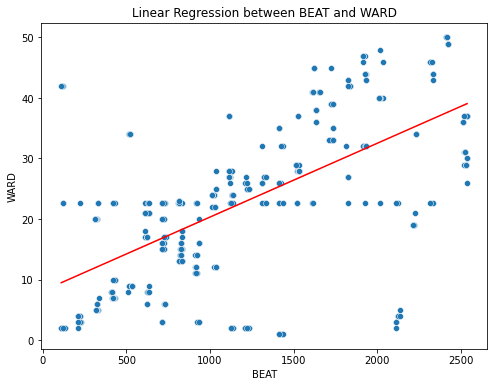

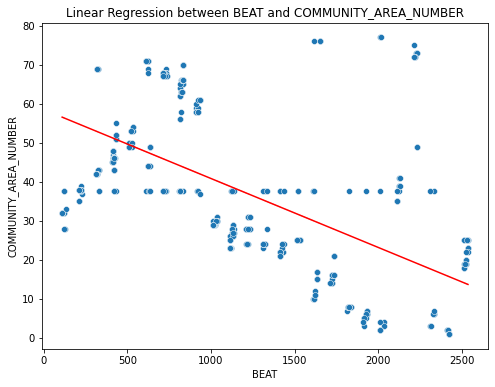

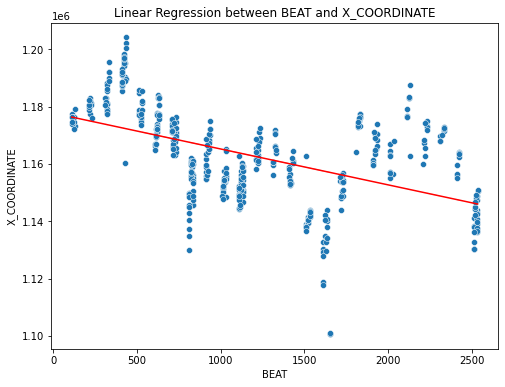

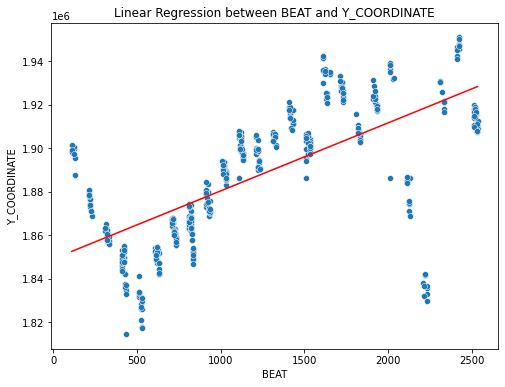

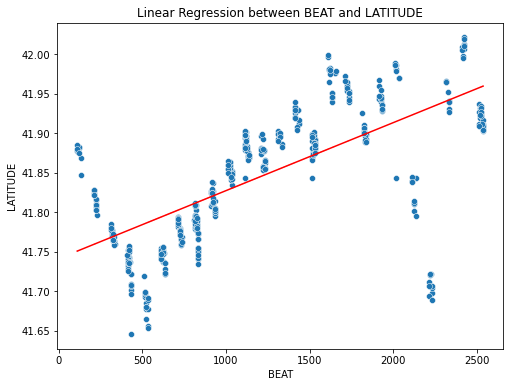

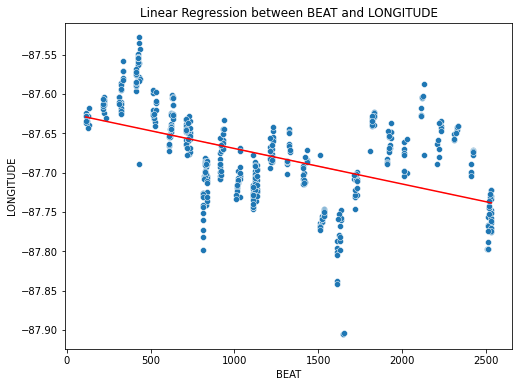

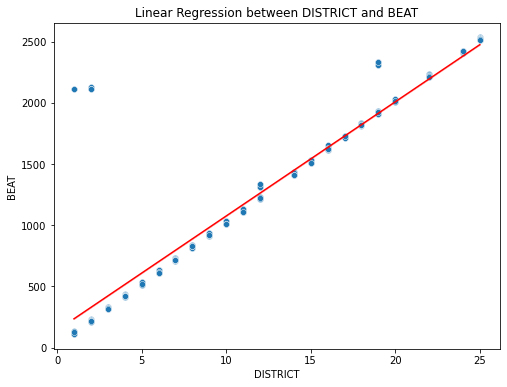

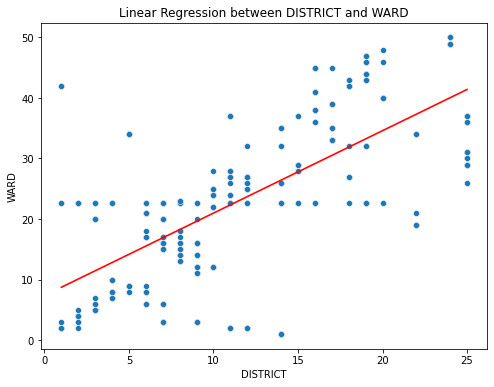

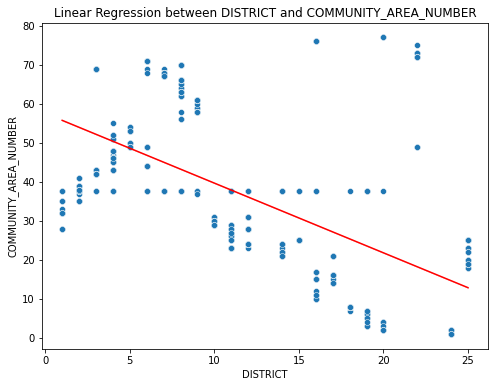

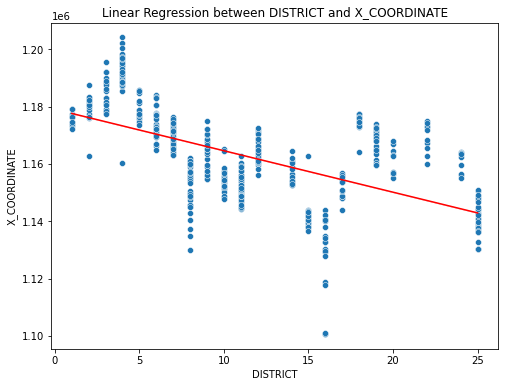

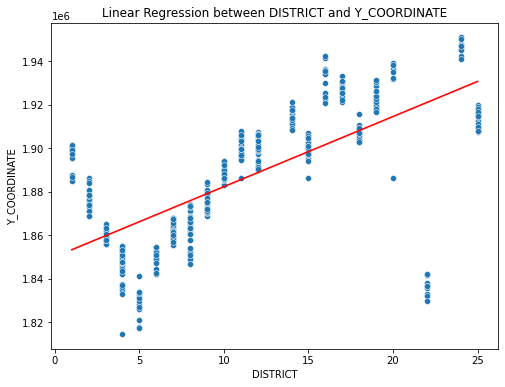

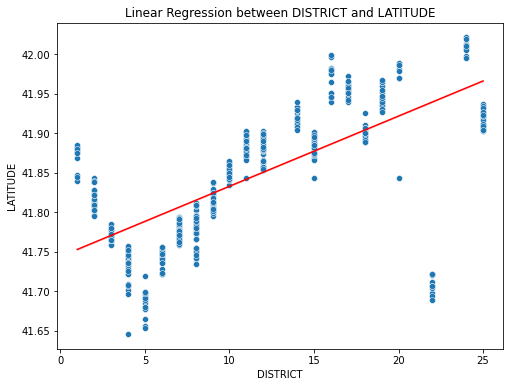

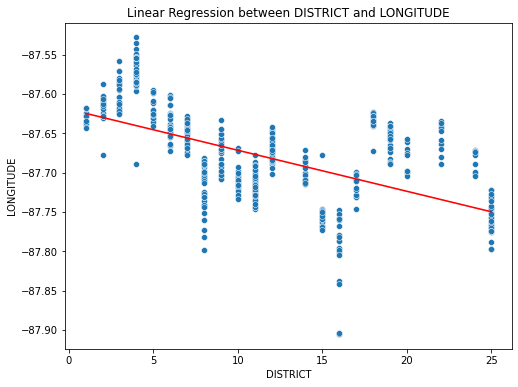

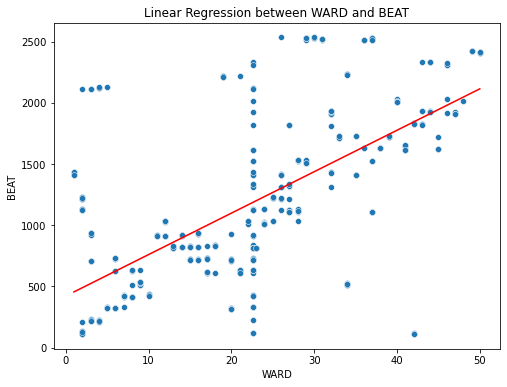

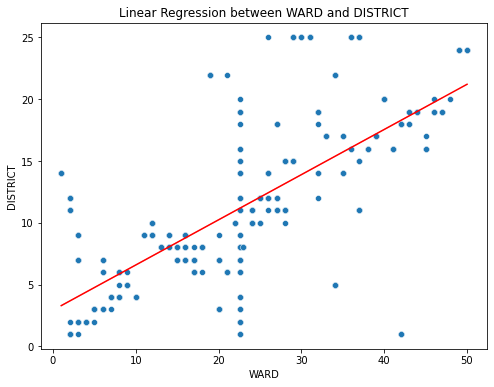

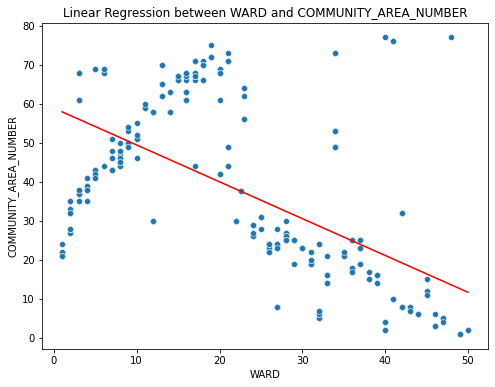

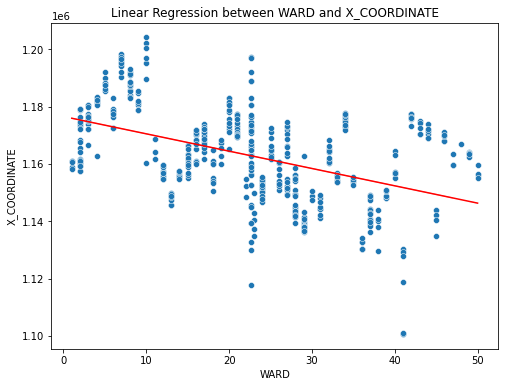

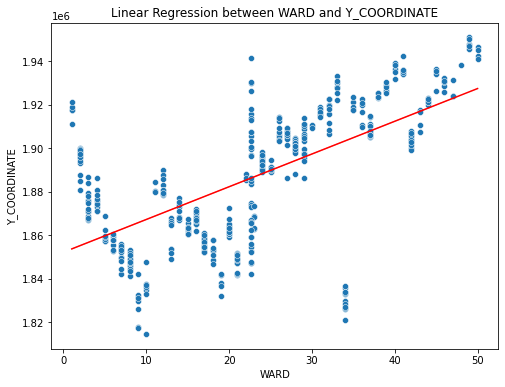

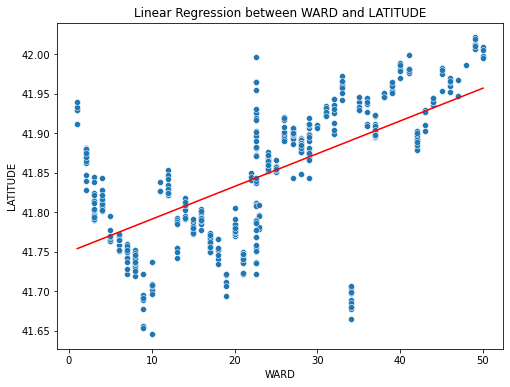

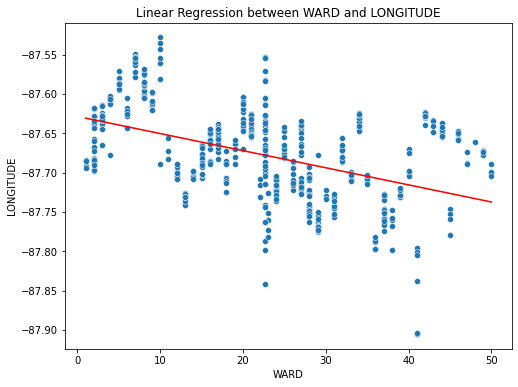

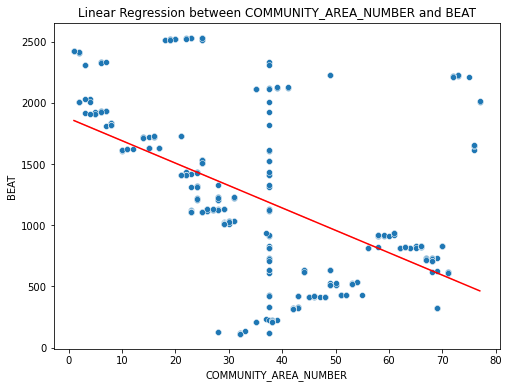

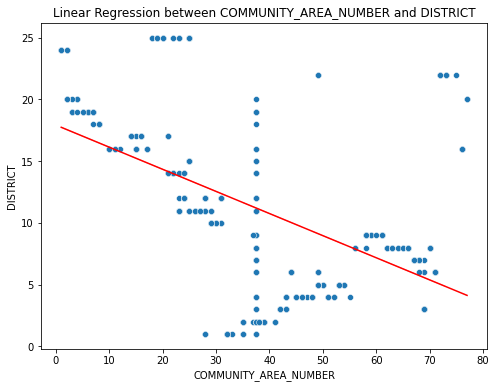

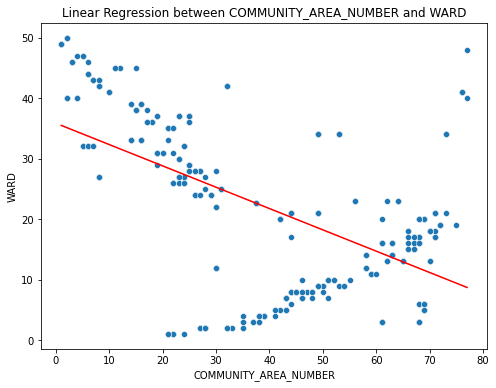

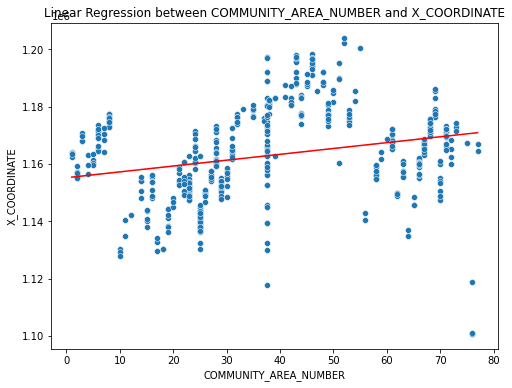

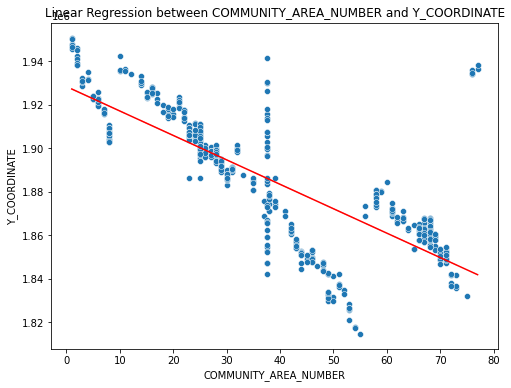

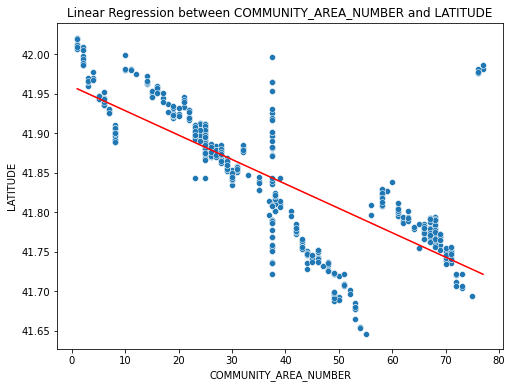

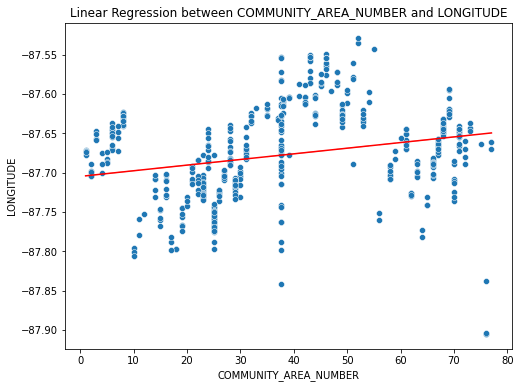

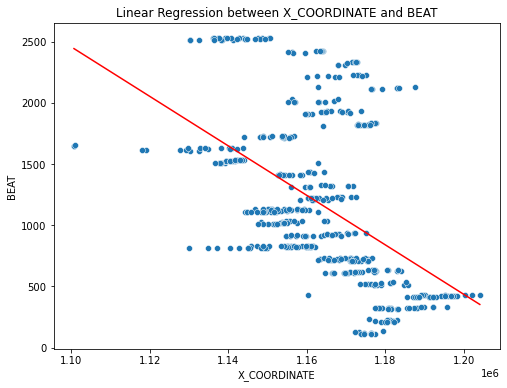

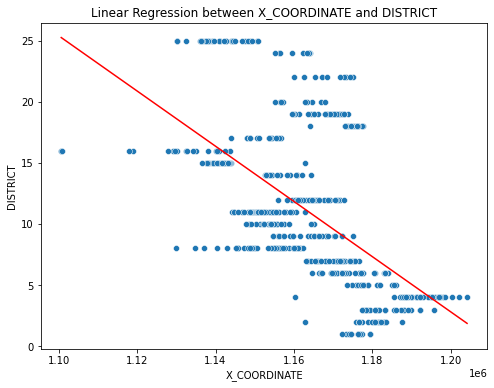

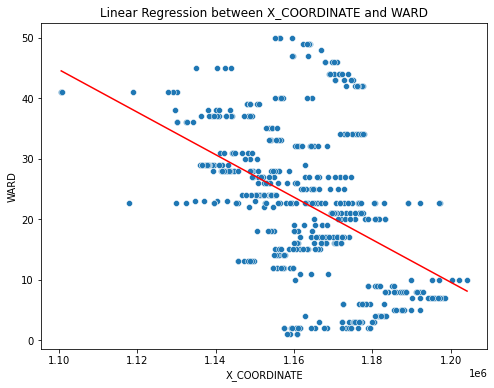

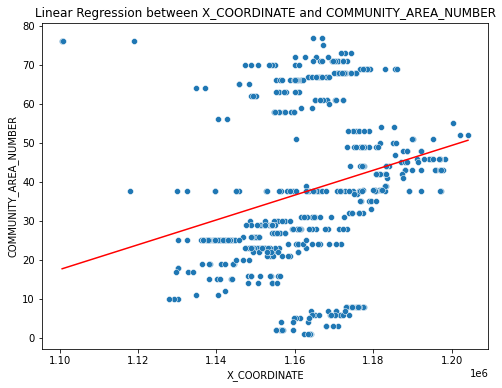

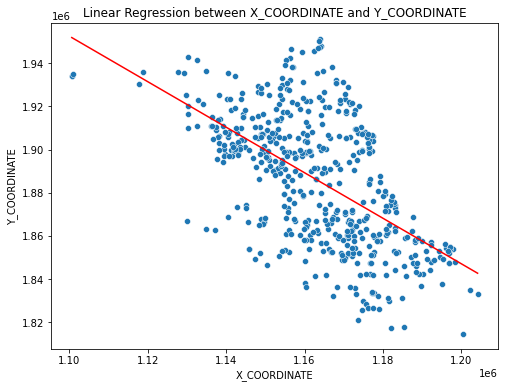

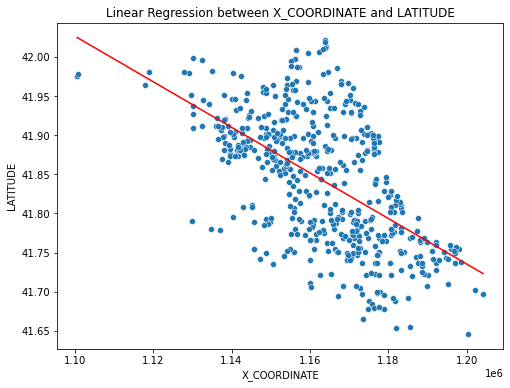

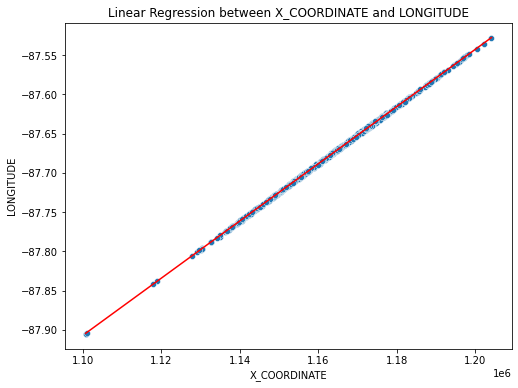

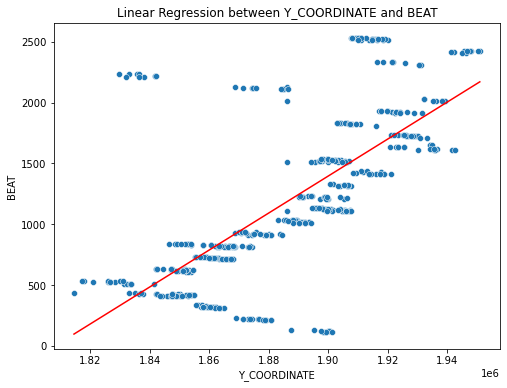

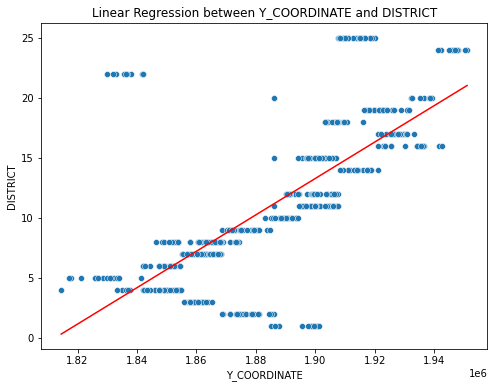

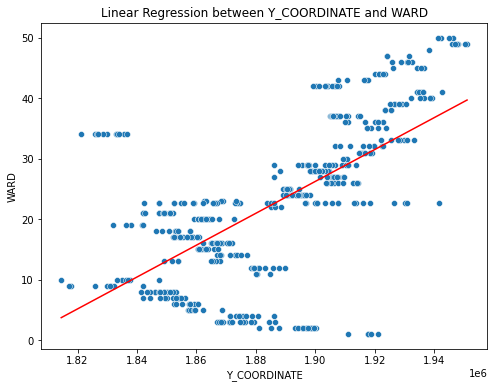

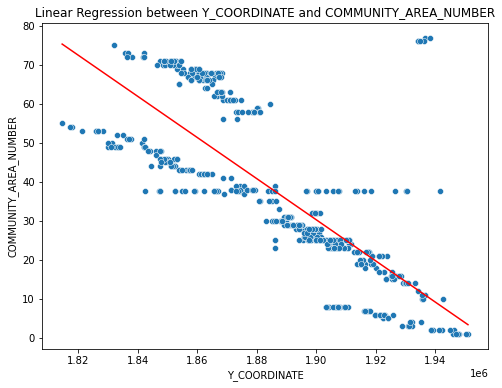

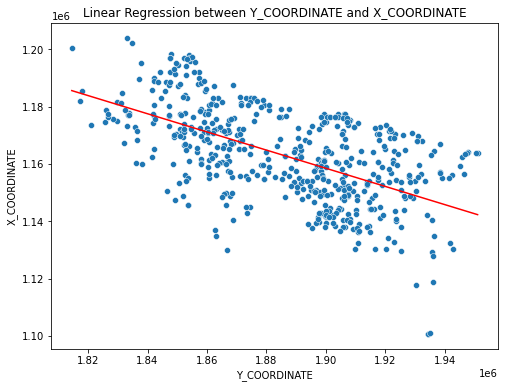

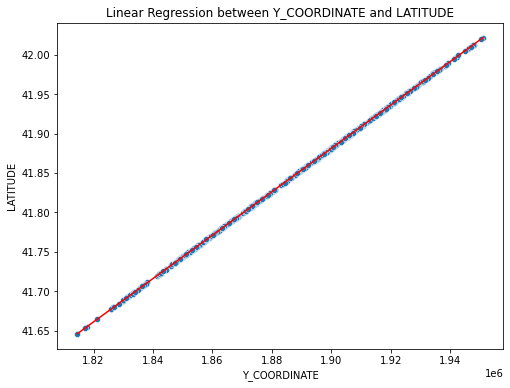

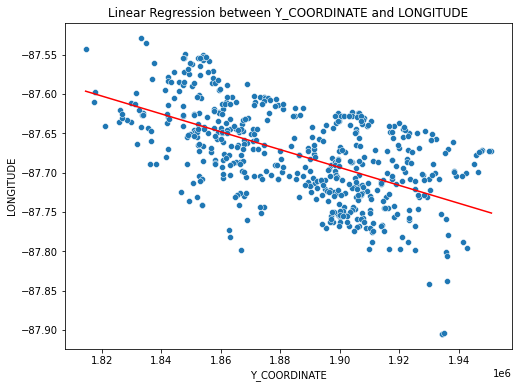

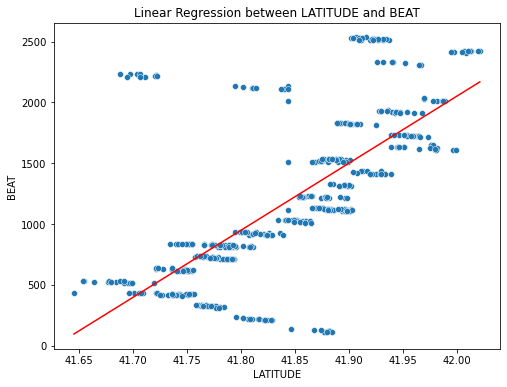

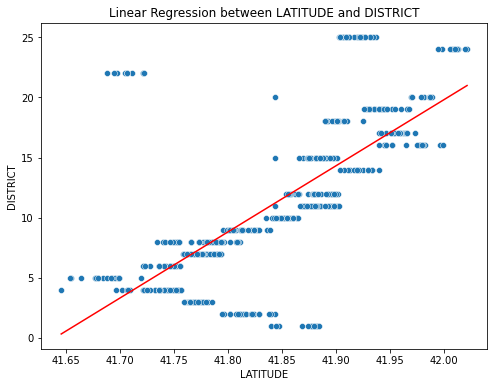

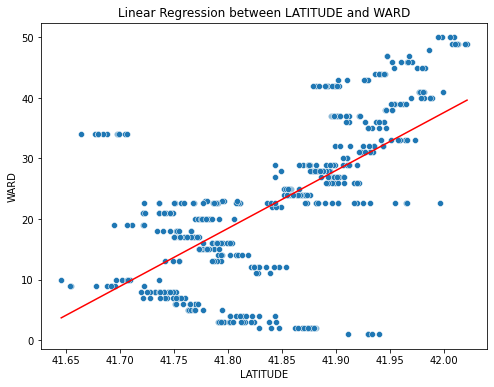

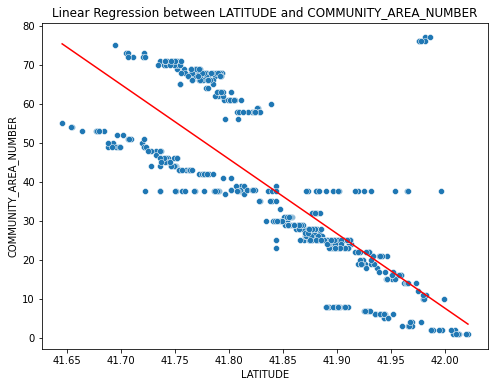

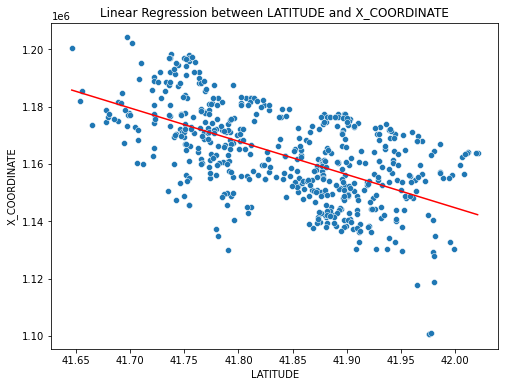

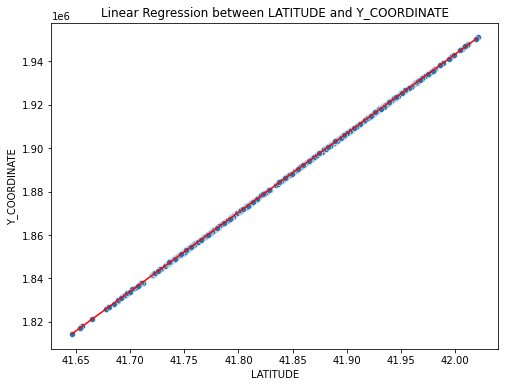

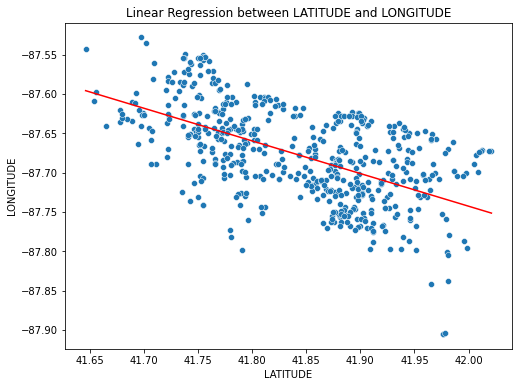

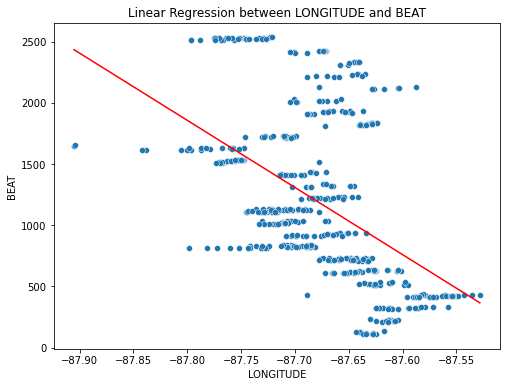

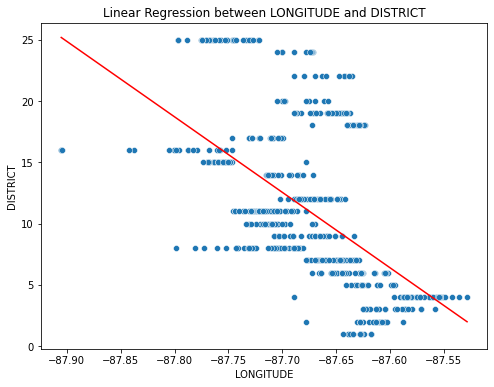

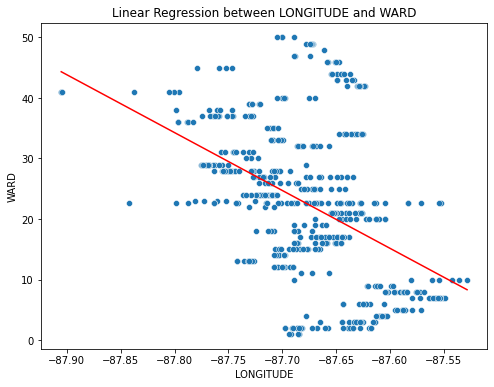

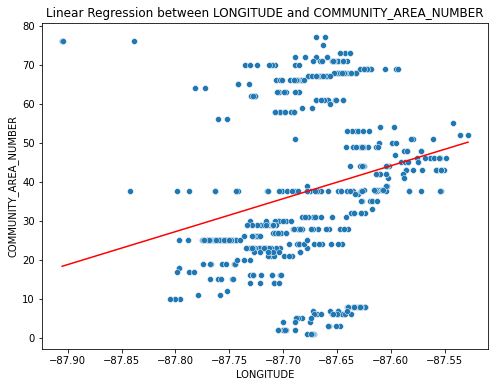

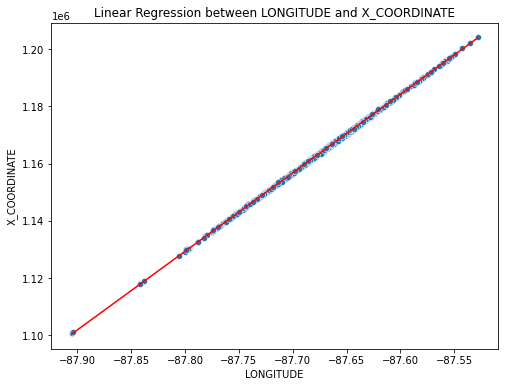

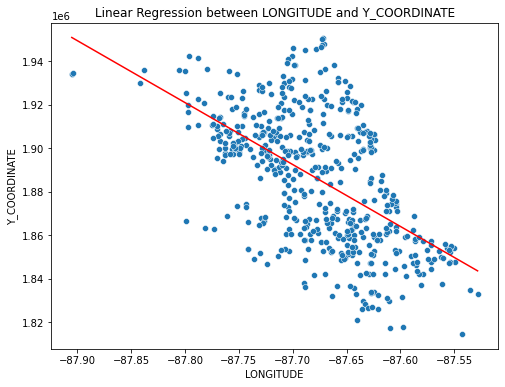

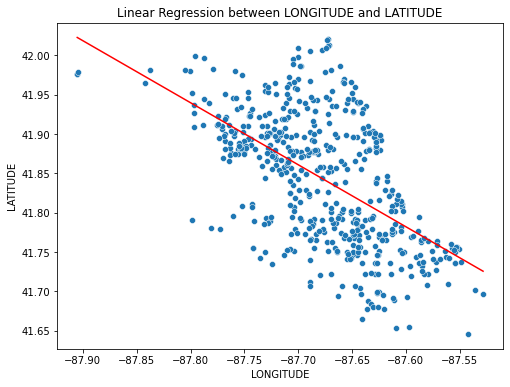

In [58]:
# Correlation coefficient for all possible pairs of quantitative variables
for col1 in additional_numerical_cols:
    for col2 in additional_numerical_cols:
        if col1 != col2:
            correlation_coefficient = data[[col1, col2]].corr()
            plt.figure(figsize=(8, 6))
            sns.heatmap(correlation_coefficient, annot=True, cmap='coolwarm')
            plt.title(f"\nCorrelation Coefficient between {col1} and {col2}:")
            plt.show()


# Linear regression for all possible pairs of quantitative variables
for col1 in additional_numerical_cols:
    for col2 in additional_numerical_cols:
        if col1 != col2:
            slope, intercept, r_value, p_value, std_err = stats.linregress(data[col1], data[col2])
            
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=data[col1], y=data[col2])
            plt.title(f'Linear Regression between {col1} and {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            
            # Plotting the regression line
            sns.lineplot(x=data[col1], y=(slope * data[col1] + intercept), color='red')
            
            plt.show()

**Analysis of a Qualitative Variable and a Quantitative Variable: Student Test, Analysis of Variance**

In [61]:
# Chi-Square Independence Test for all possible pairs of qualitative variables
for col1 in additional_categorical_cols:
    for col2 in additional_categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(data[col1], data[col2])
            chi2_stat, chi2_p, _, _ = stats.chi2_contingency(contingency_table)
            print(f"\nChi-Square Independence Test between {col1} and {col2}:")
            print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {chi2_p}")


Chi-Square Independence Test between PRIMARY_TYPE and LOCATION_DESCRIPTION:
Chi-Square Statistic: 2661.586532588523, P-Value: 2.5059875302371974e-56

Chi-Square Independence Test between PRIMARY_TYPE and ARREST:
Chi-Square Statistic: 239.28831897440995, P-Value: 1.0630663510639092e-32

Chi-Square Independence Test between PRIMARY_TYPE and DOMESTIC:
Chi-Square Statistic: 145.65929859808227, P-Value: 8.963422975444895e-16

Chi-Square Independence Test between LOCATION_DESCRIPTION and PRIMARY_TYPE:
Chi-Square Statistic: 2661.5865325885225, P-Value: 2.505987530237198e-56

Chi-Square Independence Test between LOCATION_DESCRIPTION and ARREST:
Chi-Square Statistic: 87.82677199627406, P-Value: 0.00028303201263938044

Chi-Square Independence Test between LOCATION_DESCRIPTION and DOMESTIC:
Chi-Square Statistic: 95.12205530730478, P-Value: 4.150977351353037e-05

Chi-Square Independence Test between ARREST and PRIMARY_TYPE:
Chi-Square Statistic: 239.2883189744099, P-Value: 1.0630663510639243e-32
